# library

In [1]:
import sys, os
import scipy.io, numpy
# numpy.set_printoptions(threshold=sys.maxsize)
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
# from matplotlib import style
# plt.style.use('classic')
# mpl.rc("figure", facecolor="white")

import numpy as np
import netCDF4
import matplotlib as mpl
import seaborn as sns
import matplotlib.colors as mcolors
import warnings 
warnings.filterwarnings('ignore')

# parameter space

## read data - aerosol

In [13]:
s = pd.Series(['no3','so4','oc','soa','nh4','na','cl','bc','oin','ca','co3','h2o'])
print(len(s))
print(s)
# print('bulk_'+ s[0] + '_masses')

12
0     no3
1     so4
2      oc
3     soa
4     nh4
5      na
6      cl
7      bc
8     oin
9      ca
10    co3
11    h2o
dtype: object


In [14]:
# Exclude seasalt & dust
directory = "/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/nd_log/1_part_res/scenarios"
bulk_masses = np.zeros((12,100,49))

for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_process.nc" in filename):
            sce = int(filename[-29:-27])
            ncf = scipy.io.netcdf_file(filename)
            for i in range(12):
                bulk_masses[i, sce, :] = ncf.variables['bulk_'+ s[i] + '_masses'].data * 1e9  # kg to µg

In [15]:
d_bulk = {'bulk_'+ s[0] + '_masses': bulk_masses[0,:,:].ravel(),
        'bulk_'+ s[1] + '_masses': bulk_masses[1,:,:].ravel(),
        'bulk_'+ s[2] + '_masses': bulk_masses[2,:,:].ravel(),
        'bulk_'+ s[3] + '_masses': bulk_masses[3,:,:].ravel(),
        'bulk_'+ s[4] + '_masses': bulk_masses[4,:,:].ravel(),
        'bulk_'+ s[5] + '_masses': bulk_masses[5,:,:].ravel(),
        'bulk_'+ s[6] + '_masses': bulk_masses[6,:,:].ravel(),
        'bulk_'+ s[7] + '_masses': bulk_masses[7,:,:].ravel(),
        'bulk_'+ s[8] + '_masses': bulk_masses[8,:,:].ravel(),
        'bulk_'+ s[9] + '_masses': bulk_masses[9,:,:].ravel(),
        'bulk_'+ s[10] + '_masses': bulk_masses[10,:,:].ravel(),
        'bulk_'+ s[11] + '_masses': bulk_masses[11,:,:].ravel(),
        'bulk_org_masses': bulk_masses[2,:,:].ravel() + bulk_masses[3,:,:].ravel()}
df_bulk = pd.DataFrame(data=d_bulk)
print(df_bulk.shape)
df_bulk_2ndngt = df_bulk[((df_bulk.index.values % 49) >= 37) & ((df_bulk.index.values % 49) <= 48)]  # ngt: night
print(df_bulk_2ndngt.shape)

(4900, 13)
(1200, 13)


## read data - gas

In [5]:
s1 = pd.Series(['n2o5','o3','no','no2','hno3','h2so4','hcl','nh3'])
print(len(s1))
print(s1)

8
0     n2o5
1       o3
2       no
3      no2
4     hno3
5    h2so4
6      hcl
7      nh3
dtype: object


In [6]:
# Read data
gas_mixing_ratio = np.zeros((100, 49, 77))
sce_ind = np.zeros(100)
hour = np.zeros(49)
time = np.zeros(49)

directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/nd_log/1_part_res/scenarios'
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_0001" in filename) and (".nc") in filename:
#             print(filename)
            sce = int(filename[-35:-33])
            hr = int(filename[-5:-3]) - 1
            ncf = scipy.io.netcdf_file(filename, mmap=False)
            gas_mixing_ratio[sce, hr, :] = ncf.variables["gas_mixing_ratio"].data
            sce_ind[sce] = sce
            time[hr] =  ncf.variables["time"].data/3600
            hour[:] = hr

In [7]:
d_gas = {'n2o5': gas_mixing_ratio[:, :, 7].ravel(),
         'o3': gas_mixing_ratio[:, :, 10].ravel(),
         'no': gas_mixing_ratio[:, :, 4].ravel(),
         'no2': gas_mixing_ratio[:, :, 5].ravel(),
         'hno3': gas_mixing_ratio[:, :, 1].ravel(),
         'h2so4': gas_mixing_ratio[:, :, 0].ravel(),
         'hcl': gas_mixing_ratio[:, :, 2].ravel(),
         'nh3': gas_mixing_ratio[:, :, 3].ravel(),
         }
df_gas = pd.DataFrame(data=d_gas)

## read data - combined

In [54]:
temp = np.zeros((100,49))
p = np.zeros((100,49))

for i in range(100):
    f = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/nd_log/1_part_res/scenarios/scenario_00'+str(i).zfill(2)+'/out/urban_plume_0001_env.txt'
    temp[i,:] = pd.read_csv(f,header=None,sep='\s+').iloc[:,1] # time, temperature, RH, pressure, mixing height
    p[i,:] = pd.read_csv(f,header=None,sep='\s+').iloc[:,3]

print(temp.shape)
print(temp)
print(p)
d_env = {'temp': temp[:,:].ravel(),
         'p': p[:,:].ravel()}
df_env = pd.DataFrame(data=d_env)
print(df_env.shape)
# rh = df_env.iloc[:,2]*100

(100, 49)
[[265.262 265.262 265.262 ... 265.262 265.262 265.262]
 [266.099 266.099 266.099 ... 266.099 266.099 266.099]
 [302.013 302.013 302.013 ... 302.013 302.013 302.013]
 ...
 [303.849 303.849 303.849 ... 303.849 303.849 303.849]
 [266.46  266.46  266.46  ... 266.46  266.46  266.46 ]
 [289.486 289.486 289.486 ... 289.486 289.486 289.486]]
[[100000. 100000. 100000. ... 100000. 100000. 100000.]
 [100000. 100000. 100000. ... 100000. 100000. 100000.]
 [100000. 100000. 100000. ... 100000. 100000. 100000.]
 ...
 [100000. 100000. 100000. ... 100000. 100000. 100000.]
 [100000. 100000. 100000. ... 100000. 100000. 100000.]
 [100000. 100000. 100000. ... 100000. 100000. 100000.]]
(4900, 2)


In [55]:
hno3_mass_conc = gas_mixing_ratio[:, :, 1].ravel()*(df_env.p*63e-3)/(8.314*df_env.temp)
h2so4_mass_conc = gas_mixing_ratio[:, :, 0].ravel()*(df_env.p*98e-3)/(8.314*df_env.temp)

d_species = {'nitrate': hno3_mass_conc + bulk_masses[0,:,:].ravel(),
             'so4': bulk_masses[1,:,:].ravel(),
             'oc': bulk_masses[2,:,:].ravel(),
             'soa': bulk_masses[3,:,:].ravel(),
             'nh4': bulk_masses[4,:,:].ravel(),
             'bc': bulk_masses[7,:,:].ravel(),
             'n2o5': gas_mixing_ratio[:, :, 7].ravel(),
             'o3': gas_mixing_ratio[:, :, 10].ravel(),
             'no': gas_mixing_ratio[:, :, 4].ravel(),
             'no2': gas_mixing_ratio[:, :, 5].ravel(),}
df_species = pd.DataFrame(data = d_species)
print(df_species.shape)
# print(df_species)
print(df_species['n2o5'].min(),df_species['n2o5'].max())

(4900, 10)
0.0 13.139357069093787


In [56]:
s2 = pd.Series(['nitrate','so4','oc','soa','nh4','bc','n2o5','o3','no','no2'])
print(len(s2))
print(s2)

10
0    nitrate
1        so4
2         oc
3        soa
4        nh4
5         bc
6       n2o5
7         o3
8         no
9        no2
dtype: object


## plot

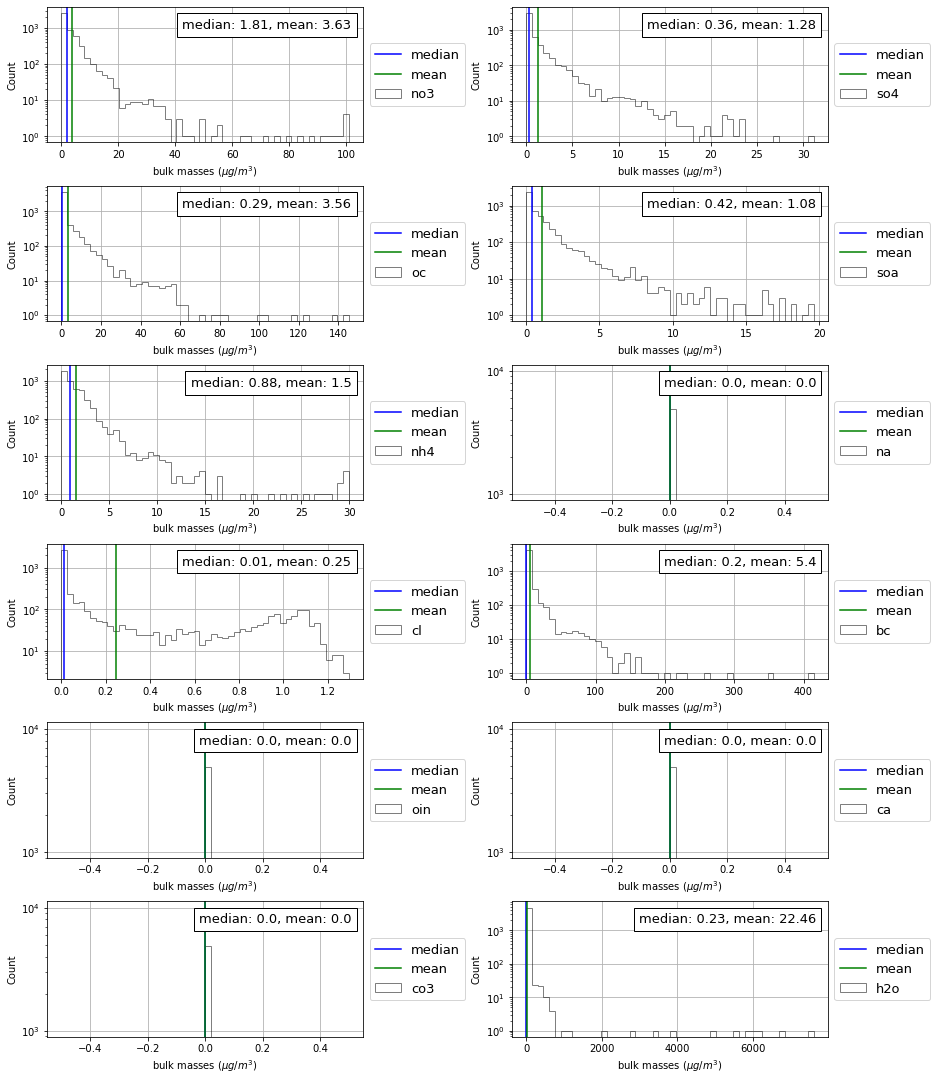

In [11]:
from matplotlib.offsetbox import AnchoredText

fig, ax = plt.subplots(6,2,figsize=(13,15))
mpl.rcParams['font.size'] = 13
plt.rcParams['text.usetex'] = False

p = 0
for i in np.arange(0,12,2):
    ax[p,0].hist(data = df_bulk, x = 'bulk_'+ s[i] + '_masses', bins = 50, edgecolor= 'k', alpha=0.5, histtype = 'step', label = s[i])
    ax[p,0].axvline(x = np.median(df_bulk['bulk_'+s[i]+'_masses']), color = 'b', label = 'median')
    ax[p,0].axvline(x = np.mean(df_bulk['bulk_'+s[i]+'_masses']), color = 'g', label = 'mean')
    ax[p,0].set_xlabel(r'bulk masses ($\mu g/m^3$)')
    ax[p,0].set_yscale('LOG')
    ax[p,0].set_ylabel('Count')
#     plt.xlim(0, max(df_nsdm_2ndngt['bulk_'+ s[i] + '_masses']))
    ax[p,0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    mean = np.round(np.mean(df_bulk['bulk_'+s[i]+'_masses']), 2)
    median = np.round(np.median(df_bulk['bulk_'+s[i]+'_masses']), 2)
    anchored_text = AnchoredText("median: " + str(median) +", mean: " + str(mean), loc = 1)
    ax[p,0].add_artist(anchored_text)
    ax[p,0].grid()
    plt.tight_layout(pad = 0.5)
    p = p + 1

p = 0
for i in np.arange(1,13,2):
    ax[p,1].hist(data = df_bulk, x = 'bulk_'+ s[i] + '_masses', bins = 50, edgecolor= 'k', alpha=0.5, histtype = 'step', label = s[i])
    ax[p,1].axvline(x = np.median(df_bulk['bulk_'+s[i]+'_masses']), color = 'b', label = 'median')
    ax[p,1].axvline(x = np.mean(df_bulk['bulk_'+s[i]+'_masses']), color = 'g', label = 'mean')
    ax[p,1].set_xlabel(r'bulk masses ($\mu g/m^3$)')
    ax[p,1].set_yscale('LOG')
    ax[p,1].set_ylabel('Count')
#     plt.xlim(0, max(df_nsdm_2ndngt['bulk_'+ s[i] + '_masses']))
    ax[p,1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    mean = np.round(np.mean(df_bulk['bulk_'+s[i]+'_masses']), 2)
    median = np.round(np.median(df_bulk['bulk_'+s[i]+'_masses']), 2)
    anchored_text = AnchoredText("median: " + str(median) +", mean: " + str(mean), loc = 1)
    ax[p,1].add_artist(anchored_text)
    ax[p,1].grid()
    plt.tight_layout(pad = 0.5)
    p = p + 1

plt.savefig('aero_parameter_space.pdf')

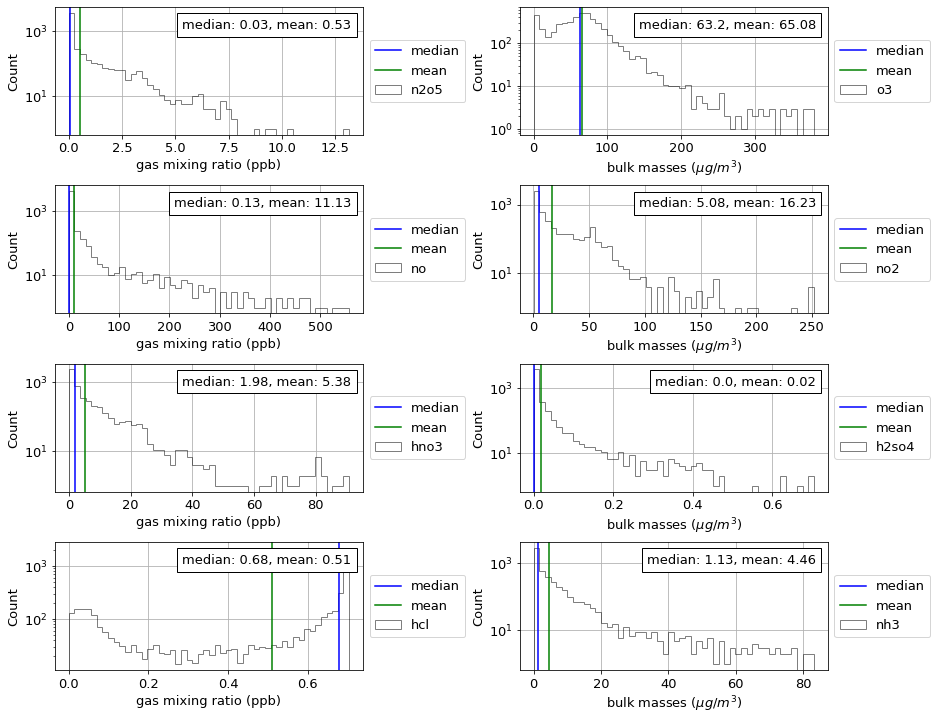

In [12]:
from matplotlib.offsetbox import AnchoredText

fig, ax = plt.subplots(4,2,figsize=(13,10))
mpl.rcParams['font.size'] = 13
plt.rcParams['text.usetex'] = False

p = 0
for i in np.arange(0,8,2):
    ax[p,0].hist(data = df_gas, x = s1[i], bins = 50, edgecolor= 'k', alpha=0.5, histtype = 'step', label = s1[i])
    ax[p,0].axvline(x = np.median(df_gas[s1[i]]), color = 'b', label = 'median')
    ax[p,0].axvline(x = np.mean(df_gas[s1[i]]), color = 'g', label = 'mean')
    ax[p,0].set_xlabel('gas mixing ratio (ppb)')
    ax[p,0].set_yscale('LOG')
    ax[p,0].set_ylabel('Count')
#     plt.xlim(0, max(df_nsdm_2ndngt['bulk_'+ s[i] + '_masses']))
    ax[p,0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    mean = np.round(np.mean(df_gas[s1[i]]), 2)
    median = np.round(np.median(df_gas[s1[i]]), 2)
    anchored_text = AnchoredText("median: " + str(median) +", mean: " + str(mean), loc = 1)
    ax[p,0].add_artist(anchored_text)
    ax[p,0].grid()
    plt.tight_layout(pad = 0.5)
    p = p + 1

p = 0
for i in np.arange(1,9,2):
    ax[p,1].hist(data = df_gas, x = s1[i], bins = 50, edgecolor= 'k', alpha=0.5, histtype = 'step', label = s1[i])
    ax[p,1].axvline(x = np.median(df_gas[s1[i]]), color = 'b', label = 'median')
    ax[p,1].axvline(x = np.mean(df_gas[s1[i]]), color = 'g', label = 'mean')
    ax[p,1].set_xlabel(r'bulk masses ($\mu g/m^3$)')
    ax[p,1].set_yscale('LOG')
    ax[p,1].set_ylabel('Count')
#     plt.xlim(0, max(df_nsdm_2ndngt['bulk_'+ s[i] + '_masses']))
    ax[p,1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    mean = np.round(np.mean(df_gas[s1[i]]), 2)
    median = np.round(np.median(df_gas[s1[i]]), 2)
    anchored_text = AnchoredText("median: " + str(median) +", mean: " + str(mean), loc = 1)
    ax[p,1].add_artist(anchored_text)
    ax[p,1].grid()
    plt.tight_layout(pad = 0.5)
    p = p + 1

plt.savefig('gas_parameter_space.pdf')

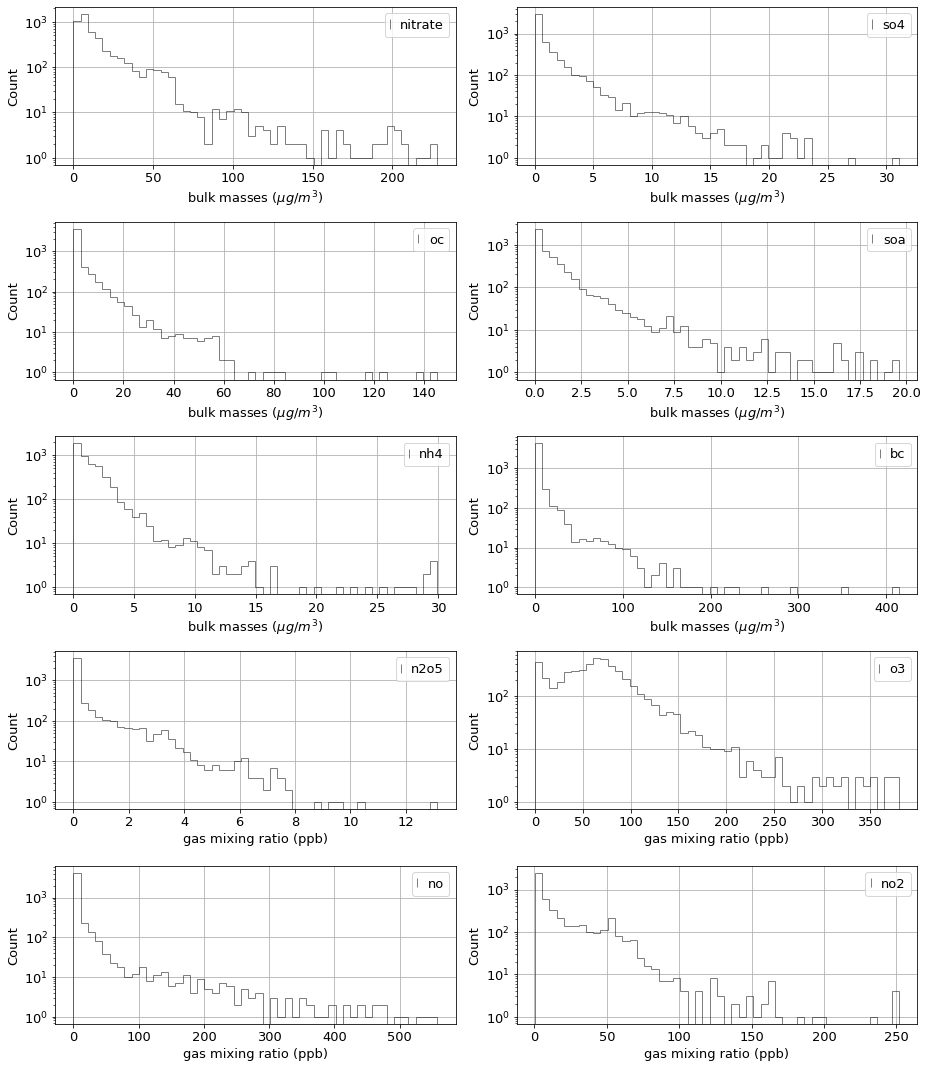

In [57]:
plt.figure(figsize=(13,15))
mpl.rcParams['font.size'] = 13
plt.rcParams['text.usetex'] = False

for i in range(6):
    plt.subplot(5,2,i+1)
    plt.hist(data = df_species, x = s2[i], bins = 50, edgecolor= 'k', alpha=0.5, histtype = 'step', label = s2[i])
    plt.xlabel(r'bulk masses ($\mu g/m^3$)')
    plt.yscale('LOG')
    plt.ylabel('Count')
#     plt.xlim(0, max(df_nsdm_2ndngt['bulk_'+ s[i] + '_masses']))
    plt.legend()
    plt.grid()
for i in [6,7,8,9]:
    plt.subplot(5,2,i+1)
    plt.hist(data = df_species, x = s2[i], bins = 50, edgecolor= 'k', alpha=0.5, histtype = 'step', label = s2[i])
    plt.xlabel(r'gas mixing ratio (ppb)')
    plt.yscale('LOG')
    plt.ylabel('Count')
#     plt.xlim(0, max(df_nsdm_2ndngt['bulk_'+ s[i] + '_masses']))
    plt.legend()
    plt.grid() 
plt.tight_layout(pad = 1.0)
# plt.savefig('1.pdf')

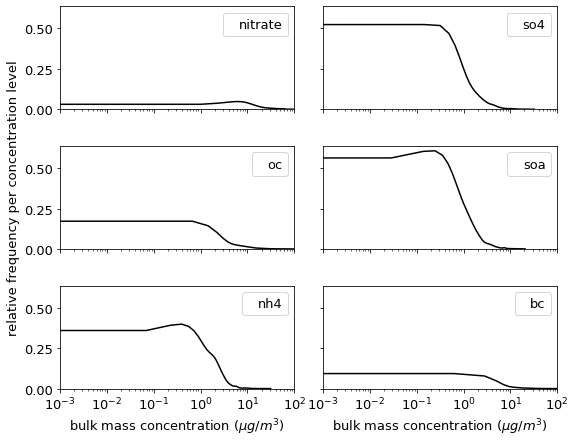

In [81]:
fig, ax = plt.subplots(3,2,figsize=(8,6),sharex = False, sharey = True)

mpl.rcParams['font.size'] = 13
plt.rcParams['text.usetex'] = False
from scipy import stats

for i in range(6):
    p = sns.distplot(ax = ax[int(i/2),i%2], x = df_species[s2[i]], bins = 100, hist = False, kde = True, color = 'k', label = s2[i])
    ax[int(i/2),i%2].set_xscale('log')
#     plt.xlim(0, max(df_nsdm_2ndngt['bulk_'+ s[i] + '_masses']))
    ax[int(i/2),i%2].set_xlim(1e-3,1e2)
    ax[int(i/2),i%2].legend()
    # ax[int(i/2),i%2].grid()

plt.tight_layout(pad=1.0)
plt.setp(ax[-1, :], xlabel=r'bulk mass concentration ($\mu g/m^3$)')
plt.setp(ax[0, 0], ylabel='')
plt.setp(ax[2, 0], ylabel='')
plt.setp(ax[1, 0], ylabel='relative frequency per concentration level')
for ax in fig.get_axes():
    ax.label_outer()

[Text(0.5, 8.40000000000003, 'gas mixing ratio (ppb)'),
 Text(0.5, 8.40000000000003, 'gas mixing ratio (ppb)')]

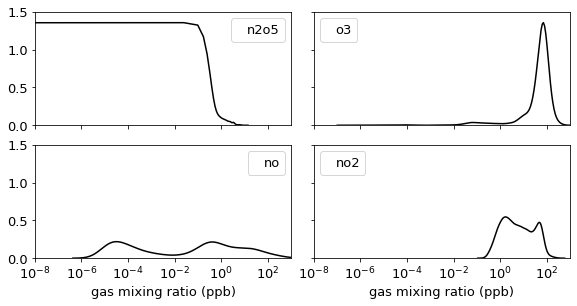

In [30]:
fig, ax = plt.subplots(2,2,figsize=(8,4),sharex = True, sharey = True)

mpl.rcParams['font.size'] = 13
mpl.rcParams['legend.handlelength'] = 0
plt.rcParams['text.usetex'] = False
from scipy import stats

for i in [6,7,8,9]:
    p = sns.distplot(ax = ax[int(i/2)-3,i%2], x = df_species[s2[i]], hist = False, kde = True, color = 'k', label = s2[i])
    ax[int(i/2)-3,i%2].set_xscale('LOG')
    ax[int(i/2)-3,i%2].set_ylabel('')
#     plt.xlim(0, max(df_nsdm_2ndngt['bulk_'+ s[i] + '_masses']))
    ax[int(i/2)-3,i%2].set_xlim(1e-8,1e3)
    ax[int(i/2)-3,i%2].set_ylim(0,1.5)
    ax[int(i/2)-3,i%2].legend(loc = i%2+1)
    # ax[int(i/2),i%2].grid() 

plt.tight_layout(pad=0.5)
plt.setp(ax[-1, :], xlabel=r'gas mixing ratio (ppb)')
# plt.text(5e-8,1.5, 'relative frequency per concentration level', va = 'center', ha = 'center', rotation = 'vertical')

(0.0, 0.0765)

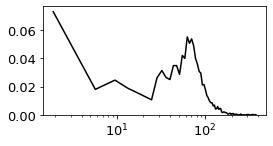

In [94]:
plt.figure(figsize=(4,2))
hist, bins = np.histogram(df_species['o3'], bins = 100)
hist = hist/len(df_species['o3'])
bins = 0.5 * (bins[1:] + bins[:-1])
plt.plot(bins, hist, color = 'k', lw = 1.5)
plt.xscale('log')
# plt.xlim(1e-2,1e2)
plt.ylim(0,)

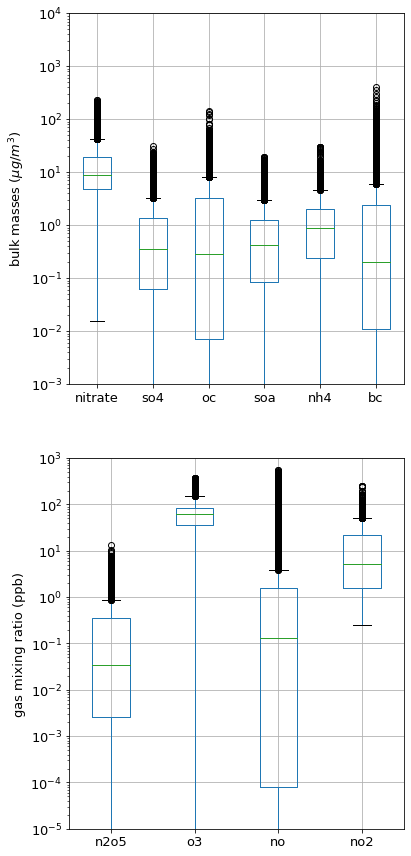

In [96]:
plt.figure(figsize=(6,15))
mpl.rcParams['font.size'] = 13
plt.rcParams['text.usetex'] = False

plt.subplot(2,1,1)
df_species.boxplot(column = ['nitrate','so4','oc','soa','nh4','bc'])
plt.yscale('log')
plt.ylabel(r'bulk masses ($\mu g/m^3$)')
plt.ylim(1e-3,1e4)

plt.subplot(2,1,2)
df_species.boxplot(column = ['n2o5','o3','no','no2'])
plt.yscale('log')
plt.ylabel(r'gas mixing ratio (ppb)')
plt.ylim(1e-5,1e3)
plt.savefig('boxplot_parameter_space')

# emissions

In [15]:
f1 = '/data/keeling/a/yicenl2/d/project_n2o5/code_scenario_generator/cases/case_4_n2o5/lhs.txt'
df1 = pd.read_csv(f1, sep = '\s+', header = None)
print(df1.shape)
# print(df)

f2 = '/data/keeling/a/yicenl2/d/project_n2o5/code_scenario_generator/cases/case_4_n2o5/lhs_linear.txt'
df2 = pd.read_csv(f2, sep = '\s+', header = None)
print(df2.shape)
# print(df)

(100, 44)
(100, 44)


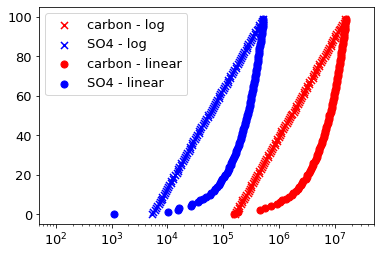

In [16]:
plt.scatter(df1.iloc[:,23].sort_values(ascending=True),df1.index, color = 'r', label = 'carbon - log', marker = 'x', s = 50)
plt.scatter(df1.iloc[:,41].sort_values(ascending=True),df1.index, color = 'b', label = 'SO4 - log', marker = 'x', s = 50)
plt.scatter(df2.iloc[:,23].sort_values(ascending=True),df2.index, color = 'r', label = 'carbon - linear', s = 50)
plt.scatter(df2.iloc[:,41].sort_values(ascending=True),df2.index, color = 'b', label = 'SO4 - linear', s = 50)
plt.xscale('log')
plt.xlim(5e1, 5e7)
plt.ylim(-5,105)
plt.legend(loc = 2, scatterpoints = 1)

# gamma_pop

## read data

In [14]:
# no seasalt & dust
gamma_pop = np.zeros((3,100,49))

directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/nd_log/1_part_res/scenarios'
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_process.nc" in filename):
            # print(filename[-29:-27])
            sce = int(filename[-29:-27])
            ncf = scipy.io.netcdf_file(filename, mmap=False)
            gamma_pop[0, sce, :] = ncf.variables["gamma_pop_pr"].data
            gamma_pop[1, sce, :] = ncf.variables["gamma_pop_comp"].data
            gamma_pop[2, sce, :] = ncf.variables["gamma_pop_core_pr"].data
            time = ncf.variables["time"].data/3600

In [3]:
gamma_pop_error = (gamma_pop[1,:,:].ravel() - 
               gamma_pop[0,:,:].ravel())/gamma_pop[0,:,:].ravel()    

d_gamma = {"gamma_pop_ref": gamma_pop[0, :, :].ravel(),  # nsd: no seasalt and dust
         "gamma_pop_comp": gamma_pop[1, :, :].ravel(),
         "gamma_pop_error": gamma_pop_error * 100}
# pd.set_option('display.max_rows', df_nsd.shape[0]+1)
df_gamma = pd.DataFrame(data=d_gamma)
print(df_gamma.shape)

df_gamma_2ndngt = df_gamma[((df_gamma.index.values % 49) >= 37) & ((df_gamma.index.values % 49) <= 48)]  # ngt: night
# pd.set_option('display.max_rows', df_nsd_2ndngt.shape[0]+1)
print(df_gamma_2ndngt.shape)
# print(df_nsd_2ndngt)

df1 = df_gamma_2ndngt.dropna()
# print(df1.shape)
null_data = df_gamma_2ndngt[df_gamma_2ndngt.isnull().any(axis=1)]
case_index = null_data.index.values
sce_index  = (case_index/49).astype(int)
hour_index = case_index % 49
print(sce_index)
print(hour_index)
print(null_data.shape)
print(df_gamma_2ndngt['gamma_pop_error'].max())

(4900, 3)
(1200, 3)
[ 0  0  1  1  1  1  1  1  1  1  1  1  1  1  6  6  6  6  6  6  6  6  6  6
  6  6  9  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 10 10 10 10 10 18
 18 18 18 18 18 18 18 18 18 18 18 26 26 26 26 26 26 26 26 26 26 26 26 39
 39 39 39 39 39 39 39 39 39 39 39 41 41 41 41 41 41 41 41 41 41 41 41 42
 42 42 42 42 42 42 42 42 42 42 42 43 43 43 43 43 43 43 43 43 43 43 45 45
 45 45 45 45 45 45 45 45 45 45 48 48 48 48 48 48 48 48 48 48 48 48 50 50
 50 50 50 50 50 50 50 50 50 50 54 54 54 54 54 54 54 54 54 54 54 54 56 56
 56 56 56 56 56 56 56 56 56 56 58 58 58 58 58 58 58 58 58 58 58 58 63 63
 63 63 63 63 63 63 63 63 63 63 65 65 65 65 65 65 65 65 65 65 65 65 68 68
 68 68 68 68 68 68 68 68 68 68 71 71 71 71 71 71 71 71 71 71 71 71 88 88
 88 88 88 88 88 88 88 88 89 89 89 89 89 89 89 89 89 89 89 89]
[47 48 37 38 39 40 41 42 43 44 45 46 47 48 37 38 39 40 41 42 43 44 45 46
 47 48 40 41 42 43 44 45 46 47 48 37 38 39 40 41 42 43 44 45 46 47 48 37
 38 39 40 41 42 43 44 45 46 47 48 37 38 39

In [19]:
pd.set_option('display.max_rows', None)
print(df1.sort_values('gamma_pop_error', ascending=True))

      gamma_pop_ref  gamma_pop_comp  gamma_pop_error
4848       0.019981        0.002318       -88.401033
4849       0.019966        0.002327       -88.343961
4847       0.019988        0.002334       -88.322582
4850       0.019939        0.002364       -88.142614
4846       0.019990        0.002377       -88.107272
4845       0.019989        0.002432       -87.833644
4844       0.019988        0.002509       -87.449708
4843       0.019988        0.002530       -87.339927
4311       0.019494        0.002482       -87.265285
4842       0.019988        0.002553       -87.228773
4841       0.019987        0.002570       -87.143905
4840       0.019987        0.002591       -87.035007
4839       0.019987        0.002609       -86.948484
4310       0.019496        0.002559       -86.874063
4309       0.019479        0.002686       -86.210591
4308       0.019491        0.002807       -85.597019
4307       0.019498        0.002837       -85.451836
4306       0.019504        0.002869       -85.

## plot

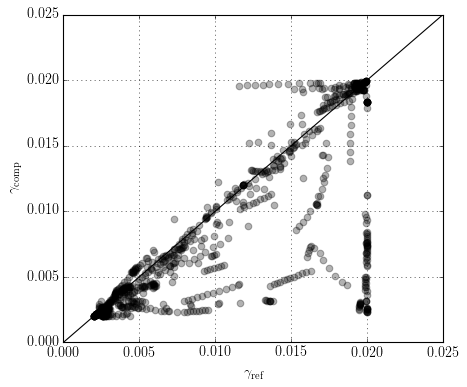

In [20]:
# Only nighttime cases

from scipy.stats import gaussian_kde
from matplotlib import style
plt.style.use('classic')
mpl.rc("figure", facecolor="white")
mpl.rcParams['font.size'] = 13
plt.rcParams['text.usetex'] = True

plt.figure(figsize=(6,5))
###################
plt.xlim(0,2.5e-2);plt.ylim(0,2.5e-2)
plt.plot([0,3e-2],[0,3e-2],'-', color='k',lw=1)
x = df1["gamma_pop_ref"]
y = df1["gamma_pop_comp"]
a = plt.scatter(x, y, s = 35, color = 'k', alpha = 0.3, vmin=0, vmax=30)
plt.xlabel(r'$\gamma_{\rm ref}$')
plt.ylabel(r'$\gamma_{\rm comp}$')
# plt.title('Library without sea salt and dust emissions')
plt.grid()

plt.tight_layout(pad=1.0)
# plt.savefig('2.pdf')

In [15]:
d_gamma_compare = {'gamma_pop': gamma_pop[0, :, :].ravel(),
                   'gamma_pop_core': gamma_pop[2, :, :].ravel()}
df_gamma_compare = pd.DataFrame(data = d_gamma_compare)
print(df_gamma_compare.shape)

df_gamma_compare_2ndngt = df_gamma_compare[((df_gamma_compare.index.values % 49) >= 37) & ((df_gamma_compare.index.values % 49) <= 48)]  # ngt: night
# pd.set_option('display.max_rows', df_nsd_2ndngt.shape[0]+1)
print(df_gamma_compare_2ndngt.shape)
# print(df_nsd_2ndngt)

(4900, 2)
(1200, 2)


<AxesSubplot:>

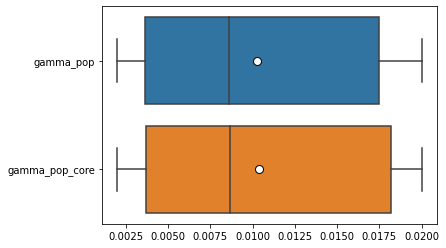

In [17]:
sns.boxplot(data = df_gamma_compare_2ndngt, orient = 'h', showfliers=True, showmeans = True, 
                    meanprops = {'marker': 'o', 'markerfacecolor': 'white', 'markeredgecolor': 'black', 'markersize': '8'})

note: (19+271)/(1200-260) = 30.8% of population have +/- 20% error

# size distributions

## positions on scatter plot

In [21]:
# Find positions on 1:1 line
nsd_case_index = df_gamma_2ndngt.index.values
nsd_sce_index  = (nsd_case_index/49).astype(int)
nsd_hour_index = nsd_case_index % 49

df_on = df_gamma_2ndngt[((np.abs(df_gamma_2ndngt["gamma_pop_error"])) < 1)]
df_above = df_gamma_2ndngt[((df_gamma_2ndngt["gamma_pop_error"]) >= 20)]
df_below = df_gamma_2ndngt[((df_gamma_2ndngt["gamma_pop_error"]) <= -20)]

### on

In [22]:
# print(df_on.sort_values(by='gamma_pop_error2', ascending=True))
case_index = df_on.sort_values(by='gamma_pop_error', ascending=True).index.values
sce_index  = (case_index/49).astype(int)
hour_index = case_index % 49
print(sce_index)
print(hour_index)
print(df_on.shape)
# pd.set_option('display.max_columns', df_wsd.shape[0]+1)

[81 66 82  7 25 81 59 66 81 94 86 81 66 25 15 66 64 66 25 66 12 99 99 12
 66 99 99 86 64 99 66 99 12 25 64 99 59 59 99 99 99 99 64 25 64 99 25 83
 75 12 20 29 38 86 77  4  4  4  4  4  4  4  4 29  4  4  4  4 78 78 27 27
 78 27 78 27 78 78 27 78 27 78 27 78 27 27 27 27 27 78 59 29 29  2  7 29
  2 29 29  2 29 29  2 29 29 29  2 78 84  2 82 78 77 66 64  2 86  2 77 12
 66  2 77 64 11 86 77 20  2 77 38  2 86  2 77 15 77 77 77 77 77 64 20 12
 25 60]
[45 39 38 46 45 46 37 40 47 41 43 48 41 37 40 42 38 43 46 44 47 38 37 48
 45 39 40 44 42 41 46 42 46 47 39 43 40 38 48 44 45 46 41 48 40 47 44 44
 42 45 43 37 37 45 37 37 45 46 47 48 44 38 43 38 39 42 40 41 41 42 37 38
 43 39 44 40 45 46 41 47 42 40 43 48 44 45 46 47 48 39 39 48 47 48 45 46
 47 39 45 46 44 43 45 40 42 41 44 38 47 43 39 37 38 48 37 42 46 41 39 44
 47 40 40 43 42 47 41 44 39 42 38 38 48 37 43 39 44 45 46 48 47 44 45 43
 38 42]
(146, 3)


### above

In [23]:
# print(df_above.sort_values(by='gamma_pop_error2', ascending=True))
case_index = df_above.sort_values(by='gamma_pop_error', ascending=True).index.values
sce_index  = (case_index/49).astype(int)
hour_index = case_index % 49
print(sce_index)
print(hour_index)
print(df_above.shape)

[37 37 21 37 57 38 90 80 38 57 90 75 57 57 57 57 57 57 57]
[39 38 48 37 40 47 38 39 48 41 37 37 42 43 44 45 46 47 48]
(19, 3)


### below

In [24]:
# print(df_below.sort_values(by='gamma_pop_error', ascending=True))
case_index = df_below.sort_values(by='gamma_pop_error', ascending=True).index.values
sce_index  = (case_index/49).astype(int)
hour_index = case_index % 49
print(sce_index)
print(hour_index)
print(df_below.shape)
# pd.set_option('display.max_rows', df_wsd.shape[0]+1)

[98 98 98 98 98 98 98 98 87 98 98 98 98 87 87 87 87 87 87 87 87 87 87 87
  9  9  9 13 13 13 13 13 13 13 76 76 76 76 13 96 76 76 76 76 13 13 13 13
 96 76 73 73 73 73 73 73 73 96 76 73 28 28 47 73 28 73 28 36 36 36 23 36
 96 36 23 36 36 36 36 36 47 36 36 28 28 23 73 28 76 24 28  0 28 24  0 96
 23  0 28 73  0 23 28 67 67 28 67  0 67 67 67 67 67 67  0 67 47 67  0 67
  0 96 96 24  0 23 96  0 96 96 76 96 96 47 23  8 24 23 23 23 47  8 30 24
 30 47 14 30 46 69 23 23 46 46 47 69 46 46 46 14 69 46 47  8 24 69 14 47
 14 30 69 14 95 47 95 95 69 95 14  8 24 14 47 46 47 14 69 95  8 72 14 72
 72 72 24 30 72 14 69 72 61 14 24 14  8 72 24 34 61 24 24 72 46 69 61  8
 72 61  8 22 22 22 59 22  8 22 95 72  8 22 22 22 30 69  8 61  8 46 72 61
 22 34 61 72 61 61 61 70 61 32 61 46 59 70 69 70 70 70 70 70 70 70 70 30
 40 46 70 32 62 22 40]
[46 47 45 48 44 43 42 41 48 40 39 38 37 47 46 45 44 43 42 41 40 39 38 37
 39 38 37 37 38 48 39 47 46 40 44 43 42 41 45 37 40 39 38 37 41 44 42 43
 38 45 37 38 39 40 41 42 43 

## read data

In [25]:
h1 = np.zeros((100,49,180)) # gamma * surf_dist
h2 = np.zeros((100,49,180)) # surf_area_dist
hgamma = np.zeros((100,49,180))
surf_area_dist = np.zeros((2,100,49,180)) # for PR
mass_dist = np.zeros((2,100,49,180))
num_dist = np.zeros((100,49,180))
no3_dist = np.zeros((100,49,180))
so4_dist = np.zeros((100,49,180))
wi_dist = np.zeros((100,49,180))

directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/nd_log/1_part_res/scenarios'
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ('out/urban_plume_00000' in filename and '.nc' in filename):
            t_index = int(filename[-13:-11]) - 1
            sce_index = int(filename[-38:-36])
            ncf = scipy.io.netcdf_file(filename)
            diam = ncf.variables["diam"].data* 1e6 # m to µm
            h1[sce_index, t_index,:] = ncf.variables["gamma_surf_pr"].data*1e6 # m-3 to cm-3
            h2[sce_index, t_index,:] = ncf.variables["surf_area_dist_pr"].data*1e6 # m-3 to cm-3
            hgamma[sce_index, t_index,:] = h1[sce_index, t_index,:]/h2[sce_index, t_index,:]
            surf_area_dist[0,sce_index,t_index,:] = ncf.variables["surf_area_dist_pr"].data*1e6
            surf_area_dist[1,sce_index,t_index,:] = ncf.variables["surf_area_dist_avg"].data*1e6
            mass_dist[0,sce_index,t_index,:] = ncf.variables["mass_dist_pr"].data*1e9 # kg to µg
            mass_dist[1,sce_index,t_index,:] = ncf.variables["mass_dist_avg"].data*1e9 # kg to µg
            num_dist[sce_index,t_index,:] = ncf.variables["num_dist"].data*1e6 # m-3 to cm-3
            no3_dist[sce_index,t_index,:] = ncf.variables["mass_no3_dist"].data*1e9
            so4_dist[sce_index,t_index,:] = ncf.variables["mass_so4_dist"].data*1e9
            wi_dist[sce_index,t_index,:] = so4_dist[sce_index,t_index,:]/(so4_dist[sce_index,t_index,:]+no3_dist[sce_index,t_index,:])

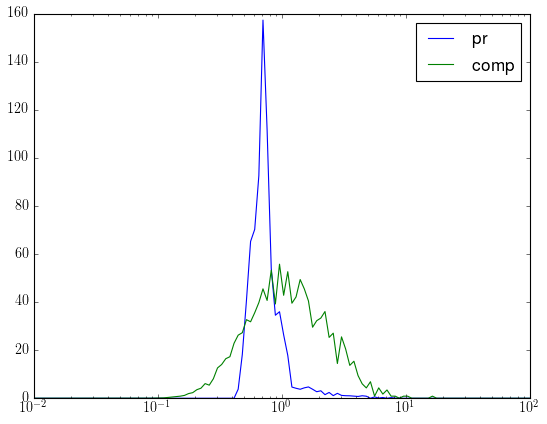

In [26]:
plt.plot(diam, mass_dist[0,27,37,:], color = 'b', label = 'pr')
plt.plot(diam,mass_dist[1,45,37,:], color = 'g', label = 'comp')
plt.xscale('log')
plt.xlim(1e-2,1e2)
plt.legend()

## plot

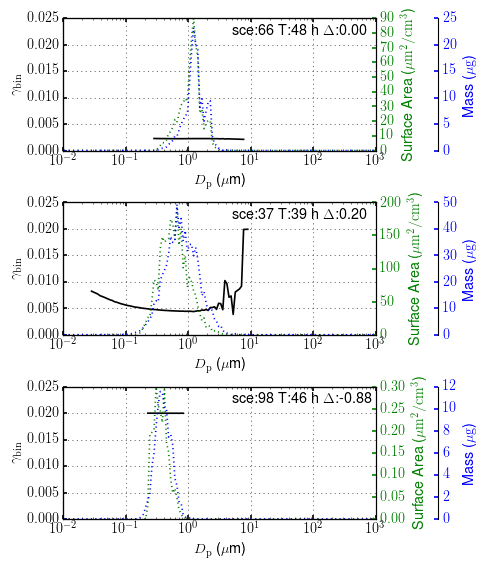

In [27]:
fig, ax = plt.subplots(3,figsize=(6,7))
fig.subplots_adjust(right=0.75)

sce_index = [66,37,98]
t_index = [48,39,46]

for i in range(3):
    twin1 = ax[i].twinx()
    twin2 = ax[i].twinx()
    # twin3 = ax[i].twinx()

    # Offset the right spine of twin2.  The ticks and label have already been
    # placed on the right by twinx above.
    twin2.spines['right'].set_position(("axes", 1.2))
    # twin3.spines['right'].set_position(("axes", 1.4))

    y = hgamma[sce_index[i], t_index[i],:]
    ym = np.isfinite(hgamma[sce_index[i], t_index[i],:])

    w = wi_dist[sce_index[i], t_index[i], :]
    wm = np.isfinite(wi_dist[sce_index[i], t_index[i], :])

    p1 = ax[i].plot(diam[ym], y[ym], color = "k", ls = '-', lw = 1.5)
    p2 = twin1.plot(diam, surf_area_dist[0,sce_index[i], t_index[i], :], color = "g", ls = ':', lw = 1.5)
    p3 = twin2.plot(diam, mass_dist[1,sce_index[i], t_index[i], :], color = "b", ls = ':', lw = 1.5)
    # p4 = twin3.plot(diam[wm], w[wm], color = "c", ls = '-', lw = 1)

    ax[i].set_xscale('log')
    ax[i].set_xlim(1e-2, 1e3)
    ax[i].set_ylim(0,0.025)
    # twin3.set_ylim(0, 1)
    # twin1.set_ylim(0, 4)
    # twin2.set_ylim(1, 65)

    ax[i].set_xlabel(r'$D_{\rm p}$ ($\mu$m)')
    ax[i].set_ylabel(r'$\rm \gamma_{bin}$') 
    twin1.set_ylabel(r'Surface Area ($\rm \mu m^2/cm^3$)')
    twin2.set_ylabel(r'Mass ($\rm \mu g$)')
    # twin3.set_ylabel(r'$\omega_{bin}$')

    ax[i].yaxis.label.set_color('k')
    twin1.yaxis.label.set_color('g')
    twin2.yaxis.label.set_color('b')
    # twin3.yaxis.label.set_color('c')

    tkw = dict(size=4, width=1.5)
    ax[i].tick_params(axis='y', colors='k', **tkw)
    twin1.tick_params(axis='y', colors='g', **tkw)
    twin2.tick_params(axis='y', colors='b', **tkw)
    # twin3.tick_params(axis='y', colors='c', **tkw)
    ax[i].tick_params(axis='x', **tkw)

    # plt.axhline(y = np.mean(nmass_dist[sce_index[i], t_index, :]), color='g')
    # plt.axhline(y = np.mean(nsurf_area_dist[sce_index[i], t_index, :]), color='r')

    error = (gamma_pop[1,sce_index[i],t_index[i]] - gamma_pop[0,sce_index[i],t_index[i]])/gamma_pop[0,sce_index[i],t_index[i]]
    ax[i].grid()
    ax[i].text(5, 0.022, r'sce:%d T:%d h $\Delta$:%.2f'% (sce_index[i], t_index[i],error))

plt.tight_layout(pad=0.5)
# ax.legend(handles=[p1, p2, p3])
# plt.savefig('gamma_overestimation.pdf')

# k_n2o5

## read data

In [28]:
# read in data with dust emission
reac_coeff_dust = np.zeros((2,100,49))
# before composition averaging - pr
directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/nd_log/1_part_res/scenarios'
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_process.nc" in filename):
#             print(filename)
            sce = int(filename[-29:-27])
            ncf = scipy.io.netcdf_file(filename, mmap=False)
            reac_coeff_dust[0, sce, :] = ncf.variables["n2o5_uptake_pr"].data
            reac_coeff_dust[1, sce, :] = ncf.variables["n2o5_uptake_comp"].data
            time = ncf.variables["time"].data/3600

In [29]:
# calculate gamma_pop_error
reac_coeff_error_dust = (reac_coeff_dust[1,:,:].ravel() - 
               reac_coeff_dust[0,:,:].ravel())/reac_coeff_dust[0,:,:].ravel()

d_k_dust = {"n2o5_uptake_ref": reac_coeff_dust[0, :, :].ravel(),  # wsd: with seasalt and dust
            "n2o5_uptake_comp": reac_coeff_dust[1, :, :].ravel(),
            "reac_coeff_error": reac_coeff_error_dust * 100}
# pd.set_option('display.max_rows', df_wsd.shape[0]+1)
df_k_dust = pd.DataFrame(data=d_k_dust)
print(df_k_dust.shape)

df_k_dust_2ndngt = df_k_dust[((df_k_dust.index.values % 49) >= 37) & ((df_k_dust.index.values % 49) <= 48)]
print(df_k_dust_2ndngt.shape)

df3 = df_k_dust_2ndngt.dropna()
print(df3.shape)
null_data = df_k_dust_2ndngt[df_k_dust_2ndngt.isnull().any(axis=1)]
null_case_index = null_data.index.values
null_sce_index  = (null_case_index/49).astype(int)
null_hour_index = null_case_index % 49
print(null_sce_index)
print(null_hour_index)
print(null_data.shape)

df_highk = df3[df3['n2o5_uptake_ref']>=1e-4]
print(df_highk)

(4900, 3)
(1200, 3)
(940, 3)
[ 0  0  1  1  1  1  1  1  1  1  1  1  1  1  6  6  6  6  6  6  6  6  6  6
  6  6  9  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 10 10 10 10 10 18
 18 18 18 18 18 18 18 18 18 18 18 26 26 26 26 26 26 26 26 26 26 26 26 39
 39 39 39 39 39 39 39 39 39 39 39 41 41 41 41 41 41 41 41 41 41 41 41 42
 42 42 42 42 42 42 42 42 42 42 42 43 43 43 43 43 43 43 43 43 43 43 45 45
 45 45 45 45 45 45 45 45 45 45 48 48 48 48 48 48 48 48 48 48 48 48 50 50
 50 50 50 50 50 50 50 50 50 50 54 54 54 54 54 54 54 54 54 54 54 54 56 56
 56 56 56 56 56 56 56 56 56 56 58 58 58 58 58 58 58 58 58 58 58 58 63 63
 63 63 63 63 63 63 63 63 63 63 65 65 65 65 65 65 65 65 65 65 65 65 68 68
 68 68 68 68 68 68 68 68 68 68 71 71 71 71 71 71 71 71 71 71 71 71 88 88
 88 88 88 88 88 88 88 88 89 89 89 89 89 89 89 89 89 89 89 89]
[47 48 37 38 39 40 41 42 43 44 45 46 47 48 37 38 39 40 41 42 43 44 45 46
 47 48 40 41 42 43 44 45 46 47 48 37 38 39 40 41 42 43 44 45 46 47 48 37
 38 39 40 41 42 43 44 45 46 47 48

## plot

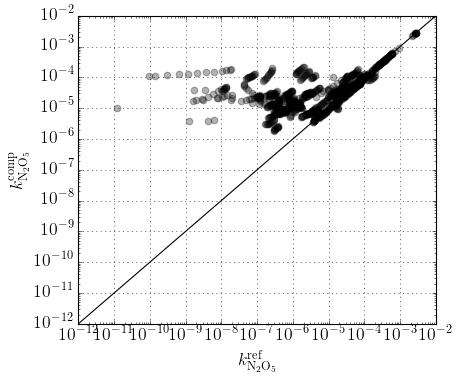

In [30]:
# Only nighttime cases

# from matplotlib import style
# plt.style.use('classic')
mpl.rc("figure", facecolor="white")
mpl.rcParams['font.size'] = 16
plt.rcParams['text.usetex'] = True

plt.figure(figsize=(6,5))
plt.xscale('log'); plt.yscale('log')
plt.plot([1e-15,1e-2],[1e-15,1e-2],'-', color='k',lw=1)
# plt.plot([0,3e-2],[0,3e-2],'-', color='k',lw=1)
x = df3["n2o5_uptake_ref"]
y = df3["n2o5_uptake_comp"]
a = plt.scatter(x, y, s = 35, color = 'k', alpha = 0.3)
plt.xlim(1e-12,1e-2);plt.ylim(1e-12,1e-2)
plt.xlabel(r'$k_{\rm N_2O_5}^{\rm ref}$')
plt.ylabel(r'$k_{\rm N_2O_5}^{\rm comp}$')
# plt.text(0.0015, 0.023, r'$(a)\,dust)$')
plt.grid()

plt.tight_layout(pad=1.0)
# plt.savefig('gamma_pop_comparison.pdf')

# chi

## read data

In [2]:
# read in data with dust emission
gamma_pop = np.zeros((2,100,49))
k = np.zeros((2,100,49))
chi_n2o5 = np.zeros((6,2,100,49))
bulk_masses = np.zeros((100,49))
wet_frac = np.zeros((2,100,49))
npart = np.zeros((2,100,49))
nwet = np.zeros((2,100,49))
tot_surf_area = np.zeros((2,100,49))
# before composition averaging - pr
directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/nd_log/1_part_res/scenarios'
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_process.nc" in filename):
#             print(filename)
            sce = int(filename[-29:-27])
            ncf = scipy.io.netcdf_file(filename, mmap=False)
            gamma_pop[0, sce, :] = ncf.variables["gamma_pop_pr"].data
            gamma_pop[1, sce, :] = ncf.variables["gamma_pop_comp"].data
            k[0, sce, :] = ncf.variables["n2o5_uptake_pr"].data
            k[1, sce, :] = ncf.variables["n2o5_uptake_comp"].data
            chi_n2o5[0, 0, sce, :] = ncf.variables["chi_pr"].data
            chi_n2o5[0, 1, sce, :] = ncf.variables["chi_comp"].data
            chi_n2o5[1, 0, sce, :] = ncf.variables["chi_h2o_pr"].data
            chi_n2o5[1, 1, sce, :] = ncf.variables["chi_h2o_comp"].data
            chi_n2o5[2, 0, sce, :] = ncf.variables["chi_no3_pr"].data
            chi_n2o5[2, 1, sce, :] = ncf.variables["chi_no3_comp"].data
            chi_n2o5[3, 0, sce, :] = ncf.variables["chi_so4_pr"].data
            chi_n2o5[3, 1, sce, :] = ncf.variables["chi_so4_comp"].data
            chi_n2o5[4, 0, sce, :] = ncf.variables["chi_org_pr"].data
            chi_n2o5[4, 1, sce, :] = ncf.variables["chi_org_comp"].data
            chi_n2o5[5, 0, sce, :] = ncf.variables["chi_dust_pr"].data
            chi_n2o5[5, 1, sce, :] = ncf.variables["chi_dust_comp"].data
            bulk_masses[sce, :] = ncf.variables['bulk_h2o_masses'].data * 1e9  # kg to µg
            nwet[0, sce, :] = ncf.variables['nwet'].data
            nwet[1, sce, :] = ncf.variables['nwet_avg'].data
            npart[0, sce, :] = ncf.variables['npart'].data
            npart[1, sce, :] = ncf.variables['npart_avg'].data
            tot_surf_area[0, sce, :] = ncf.variables['tot_surf_area_pr'].data
            tot_surf_area[1, sce, :] = ncf.variables['tot_surf_area_avg'].data
            time = ncf.variables["time"].data/3600
            wet_frac[0, sce,:] = nwet[0, sce, :]/npart[0, sce, :]
            wet_frac[1, sce,:] = nwet[1, sce, :]/npart[1, sce, :]

In [3]:
rh = np.zeros((100,49))

for i in range(100):
    f = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/nd_log/1_part_res/scenarios/scenario_00'+str(i).zfill(2)+'/out/urban_plume_0001_env.txt'
    rh[i,:] = pd.read_csv(f,header=None,sep='\s+').iloc[:,2] # time, temperature, RH, pressure, mixing height

print(rh.shape)
print(rh)
# print(df_env)
# rh = df_env.iloc[:,2]*100

(100, 49)
[[0.1557 0.1557 0.1557 ... 0.1557 0.1557 0.1557]
 [0.1727 0.1727 0.1727 ... 0.1727 0.1727 0.1727]
 [0.7995 0.7995 0.7995 ... 0.7995 0.7995 0.7995]
 ...
 [0.8762 0.8762 0.8762 ... 0.8762 0.8762 0.8762]
 [0.1979 0.1979 0.1979 ... 0.1979 0.1979 0.1979]
 [0.7127 0.7127 0.7127 ... 0.7127 0.7127 0.7127]]


In [4]:
# calculate gamma_pop_error
gamma_pop_error = (gamma_pop[1,:,:].ravel() - 
               gamma_pop[0,:,:].ravel())/gamma_pop[0,:,:].ravel()
k_error = (k[1,:,:].ravel() - 
           k[0,:,:].ravel())/k[0,:,:].ravel()
tot_surf_area_diff = (tot_surf_area[1, :, :].ravel() - tot_surf_area[0, :, :].ravel())/tot_surf_area[0, :, :].ravel()

d_chi = {"gamma_pop_ref": gamma_pop[0, :, :].ravel(),  # wsd: with seasalt and dust
          "gamma_pop_comp": gamma_pop[1, :, :].ravel(),
          "gamma_pop_error": gamma_pop_error * 100,
          "k_ref": k[0, :, :].ravel(),  # wsd: with seasalt and dust
          "k_comp": k[1, :, :].ravel(),
          "k_error": k_error * 100,
          "chi_pr": chi_n2o5[0,0,:,:].ravel() * 100,
          "chi_comp": chi_n2o5[0,1,:,:].ravel() * 100,
          "chi_h2o_pr": chi_n2o5[1,0,:,:].ravel() * 100,
          "chi_h2o_comp": chi_n2o5[1,1,:,:].ravel() * 100,
          "chi_no3_pr": chi_n2o5[2,0,:,:].ravel() * 100,
          "chi_no3_comp": chi_n2o5[2,1,:,:].ravel() * 100,
          "chi_so4_pr": chi_n2o5[3,0,:,:].ravel() * 100,
          "chi_so4_comp": chi_n2o5[3,1,:,:].ravel() * 100,
          "chi_org_pr": chi_n2o5[4,0,:,:].ravel() * 100,
          "chi_org_comp": chi_n2o5[4,1,:,:].ravel() * 100,
          'wet_frac_pr': wet_frac[0,:,:].ravel() * 100,
          'wet_frac_comp': wet_frac[1,:,:].ravel() * 100,
          'tot_surf_area_diff': tot_surf_area_diff * 100,
          'rh': rh[:,:].ravel() * 100}
# pd.set_option('display.max_rows', df_wsd.shape[0]+1)
df_chi = pd.DataFrame(data=d_chi)
print(df_chi.shape)

df_chi_2ndngt = df_chi[((df_chi.index.values % 49) >= 37) & ((df_chi.index.values % 49) <= 48)]
print(df_chi_2ndngt.shape)

df4 = df_chi_2ndngt.dropna()
print(df4.shape)
print(df4.iloc[:,5])

(4900, 20)
(1200, 20)
(940, 20)
37      134521.644176
38      177852.733952
39      206953.884138
40      227061.261733
41      272922.773584
            ...      
4895        -0.253782
4896        -0.245833
4897        -0.235903
4898        -0.198401
4899        -0.264671
Name: k_error, Length: 940, dtype: float64


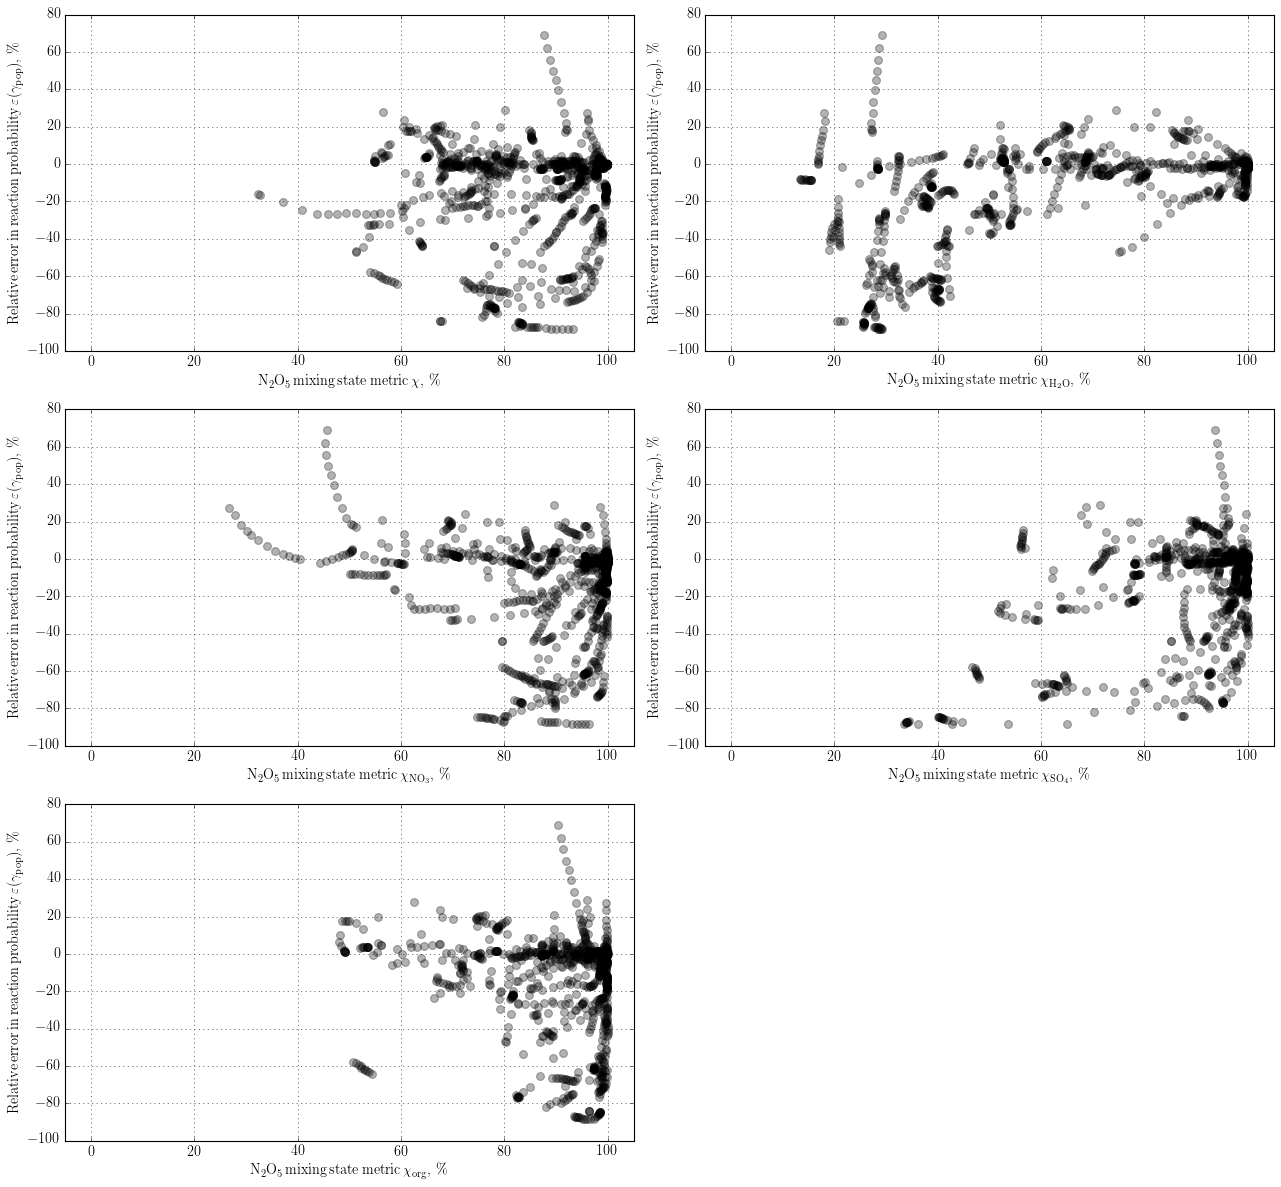

In [34]:
# Only nighttime cases
# df2 = df1[df1["wet_frac"] > 0]
# print(df2.shape)

# from matplotlib import style
# plt.style.use('classic')
# mpl.rc("figure", facecolor="white")
mpl.rcParams['font.size'] = 13
plt.rcParams['text.usetex'] = True

plt.figure(figsize=(5*1.618*2,15))
###################
plt.subplot(3,2,1)
im1 = plt.scatter(df4.chi_pr, df4.gamma_pop_error, color = 'k', alpha = 0.3, s= 50, vmin = 0, vmax = 100)
plt.xlim(-5,105)
# plt.ylim(-10,110)
plt.xlabel(r'$\rm N_2O_5 \, mixing \, state \, metric \, \chi, \, \%$')
plt.ylabel(r'$\rm Relative \, error \, in \, reaction \, probability \, \varepsilon(\gamma_{\rm pop}), \, \%$')
plt.grid()
###################
plt.subplot(3,2,2)
im1 = plt.scatter(df4.chi_h2o_pr, df4.gamma_pop_error, color = 'k', alpha = 0.3, s= 50, vmin = 0, vmax = 100)
plt.xlim(-5,105)
# plt.ylim(-10,110)
plt.xlabel(r'$\rm N_2O_5 \, mixing \, state \, metric \, \chi_{\rm H_2O}, \, \%$')
plt.ylabel(r'$\rm Relative \, error \, in \, reaction \, probability \, \varepsilon(\gamma_{\rm pop}), \, \%$')
plt.grid()
###################
plt.subplot(3,2,3)
im1 = plt.scatter(df4.chi_no3_pr, df4.gamma_pop_error, color = 'k', alpha = 0.3, s= 50, vmin = 0, vmax = 100)
plt.xlim(-5,105)
# plt.ylim(-10,110)
plt.xlabel(r'$\rm N_2O_5 \, mixing \, state \, metric \, \chi_{\rm NO_3}, \, \%$')
plt.ylabel(r'$\rm Relative \, error \, in \, reaction \, probability \, \varepsilon(\gamma_{\rm pop}), \, \%$')
plt.grid()
###################
plt.subplot(3,2,4)
im1 = plt.scatter(df4.chi_so4_pr, df4.gamma_pop_error, color = 'k', alpha = 0.3, s= 50, vmin = 0, vmax = 100)
plt.xlim(-5,105)
# plt.ylim(-10,110)
plt.xlabel(r'$\rm N_2O_5 \, mixing \, state \, metric \, \chi_{\rm SO_4}, \, \%$')
plt.ylabel(r'$\rm Relative \, error \, in \, reaction \, probability \, \varepsilon(\gamma_{\rm pop}), \, \%$')
plt.grid()
###################
plt.subplot(3,2,5)
im1 = plt.scatter(df4.chi_org_pr, df4.gamma_pop_error, color = 'k', alpha = 0.3, s= 50, vmin = 0, vmax = 100)
plt.xlim(-5,105)
# plt.ylim(-10,110)
plt.xlabel(r'$\rm N_2O_5 \, mixing \, state \, metric \, \chi_{\rm org}, \, \%$')
plt.ylabel(r'$\rm Relative \, error \, in \, reaction \, probability \, \varepsilon(\gamma_{\rm pop}), \, \%$')
plt.grid()

plt.tight_layout(pad=1.0)
# plt.savefig('relative_error_vs_chi.pdf')

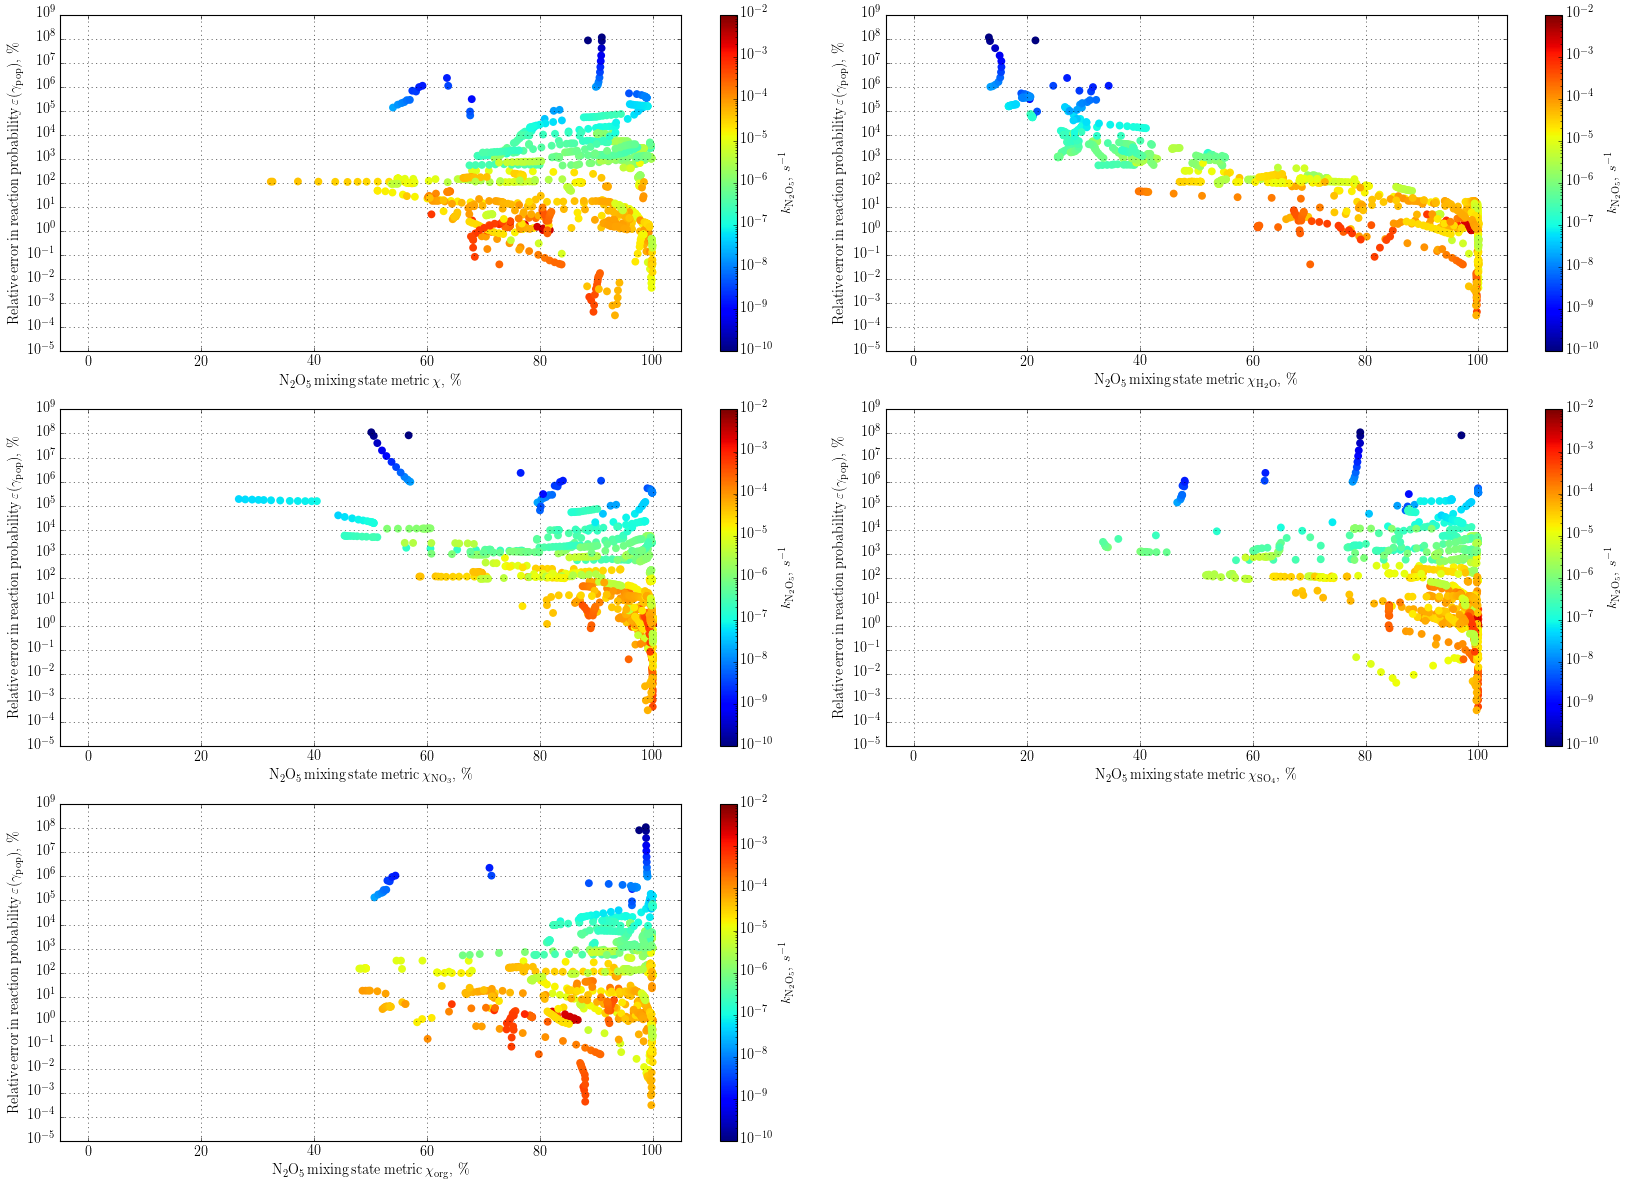

In [35]:
# Only nighttime cases
# df2 = df1[df1["wet_frac"] > 0]
# print(df2.shape)

# from matplotlib import style
# plt.style.use('classic')
# mpl.rc("figure", facecolor="white")
mpl.rcParams['font.size'] = 13
plt.rcParams['text.usetex'] = True

plt.figure(figsize=(6.5*1.618*2,15))
###################
plt.subplot(3,2,1)
im1 = plt.scatter(df4.chi_pr, abs(df4.k_error), c = df4.k_ref, edgecolors = 'none', s= 50, norm=mpl.colors.LogNorm(1e-10, 1e-2))
plt.xlim(-5,105)
# plt.ylim(-10,110)
plt.yscale('log')
plt.xlabel(r'$\rm N_2O_5 \, mixing \, state \, metric \, \chi, \, \%$')
plt.ylabel(r'$\rm Relative \, error \, in \, reaction \, probability \, \varepsilon(\gamma_{\rm pop}), \, \%$')
cbar = plt.colorbar()
cbar.set_label(r'$k_{\rm N_2O_5},\,s^{-1}$')
plt.grid()
###################
plt.subplot(3,2,2)
im1 = plt.scatter(df4.chi_h2o_pr, abs(df4.k_error), c = df4.k_ref, edgecolors = 'none', s= 50, norm=mpl.colors.LogNorm(1e-10, 1e-2))
plt.xlim(-5,105)
# plt.ylim(-10,110)
plt.yscale('log')
plt.xlabel(r'$\rm N_2O_5 \, mixing \, state \, metric \, \chi_{\rm H_2O}, \, \%$')
plt.ylabel(r'$\rm Relative \, error \, in \, reaction \, probability \, \varepsilon(\gamma_{\rm pop}), \, \%$')
cbar = plt.colorbar()
cbar.set_label(r'$k_{\rm N_2O_5},\,s^{-1}$')
plt.grid()
###################
plt.subplot(3,2,3)
im1 = plt.scatter(df4.chi_no3_pr, abs(df4.k_error), c = df4.k_ref, edgecolors = 'none', s= 50, norm=mpl.colors.LogNorm(1e-10, 1e-2))
plt.xlim(-5,105)
# plt.ylim(-10,110)
plt.yscale('log')
plt.xlabel(r'$\rm N_2O_5 \, mixing \, state \, metric \, \chi_{\rm NO_3}, \, \%$')
plt.ylabel(r'$\rm Relative \, error \, in \, reaction \, probability \, \varepsilon(\gamma_{\rm pop}), \, \%$')
cbar = plt.colorbar()
cbar.set_label(r'$k_{\rm N_2O_5},\,s^{-1}$')
plt.grid()
###################
plt.subplot(3,2,4)
im1 = plt.scatter(df4.chi_so4_pr, abs(df4.k_error), c = df4.k_ref, edgecolors = 'none', s= 50, norm=mpl.colors.LogNorm(1e-10, 1e-2))
plt.xlim(-5,105)
# plt.ylim(-10,110)
plt.yscale('log')
plt.xlabel(r'$\rm N_2O_5 \, mixing \, state \, metric \, \chi_{\rm SO_4}, \, \%$')
plt.ylabel(r'$\rm Relative \, error \, in \, reaction \, probability \, \varepsilon(\gamma_{\rm pop}), \, \%$')
cbar = plt.colorbar()
cbar.set_label(r'$k_{\rm N_2O_5},\,s^{-1}$')
plt.grid()
###################
plt.subplot(3,2,5)
im1 = plt.scatter(df4.chi_org_pr, abs(df4.k_error), c = df4.k_ref, edgecolors = 'none', s= 50, norm=mpl.colors.LogNorm(1e-10, 1e-2))
plt.xlim(-5,105)
# plt.ylim(-10,110)
plt.yscale('log')
plt.xlabel(r'$\rm N_2O_5 \, mixing \, state \, metric \, \chi_{\rm org}, \, \%$')
plt.ylabel(r'$\rm Relative \, error \, in \, reaction \, probability \, \varepsilon(\gamma_{\rm pop}), \, \%$')
cbar = plt.colorbar()
cbar.set_label(r'$k_{\rm N_2O_5},\,s^{-1}$')
plt.grid()

plt.tight_layout(pad=1.0)
# plt.savefig('relative_error_vs_chi.pdf')

## water mass ratio

In [25]:
# read in data with dust emission
bulk_h2o_masses = np.zeros((100,49))
tot_dry_masses = np.zeros((100,49))
chi_h2o = np.zeros((100,49))
tot_surf_area = np.zeros((100,49))

directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/nd_log/1_part_res/scenarios'
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_process.nc" in filename):
            sce = int(filename[-29:-27])
            ncf = scipy.io.netcdf_file(filename, mmap=False)
            time = ncf.variables["time"].data/3600
            bulk_h2o_masses[sce, :] = ncf.variables["bulk_h2o_masses"].data
            tot_dry_masses[sce, :] = ncf.variables["tot_drymass_conc"].data
            chi_h2o[sce, :] = ncf.variables["chi_h2o_pr"].data
            tot_surf_area[sce, :] = ncf.variables["tot_surf_area_pr"].data * 1e6

d_h2o = {'h2o_ratio': (bulk_h2o_masses[:, :].ravel()/(bulk_h2o_masses[:, :].ravel() + tot_dry_masses[:, :].ravel()) * 100),
         'chi_h2o': chi_h2o[:, :].ravel() * 100,
         'wet_surf_area': tot_surf_area[:, :].ravel()}
df_h2o = pd.DataFrame(data = d_h2o)
print(df_h2o.shape)

(4900, 3)


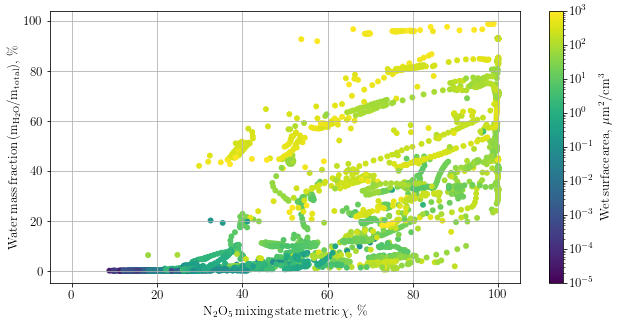

In [27]:
mpl.rcParams['font.size'] = 13
plt.rcParams['text.usetex'] = True

plt.figure(figsize=(6.5*1.618,5))
###################
im1 = plt.scatter(df_h2o.chi_h2o, df_h2o.h2o_ratio, c = df_h2o.wet_surf_area, edgecolors = 'none', s= 35, norm=mpl.colors.LogNorm(1e-5, 1e3))
plt.xlim(-5,105)
# plt.ylim(-10,110)
# plt.yscale('log')
plt.xlabel(r'$\rm N_2O_5 \, mixing \, state \, metric \, \chi, \, \%$')
plt.ylabel(r'$\rm Water \, mass \, fraction \, (m_{\rm H_2O}/m_{\rm total}), \, \%$')
cbar = plt.colorbar()
cbar.set_label(r'$\rm Wet \, surface \, area, \, \mu m^2/cm^3$')
plt.grid()

# low chi value cases

## selection

In [36]:
df_dust_lowchi = df4[(df4.chi_h2o_pr <= 20)]
print(df_dust_lowchi.shape)
print(df_dust_lowchi.sort_values('chi_h2o_pr', ascending=True))

case_index = df_dust_lowchi.index.values
sce_index  = (case_index/49).astype(int)
hour_index = case_index % 49
print(sce_index)
print(hour_index)

(32, 20)
      gamma_pop_ref  gamma_pop_comp  gamma_pop_error         k_ref    k_comp  \
2449       0.020000        0.018357        -8.213828  9.526588e-11  0.000107   
2448       0.020000        0.018356        -8.219040  1.422491e-10  0.000112   
2438       0.019999        0.018338        -8.305794  1.903458e-08  0.000187   
2439       0.020000        0.018331        -8.343349  1.705772e-08  0.000177   
2447       0.020000        0.018351        -8.245365  2.998549e-10  0.000119   
2440       0.020000        0.018328        -8.358340  1.383624e-08  0.000168   
2441       0.020000        0.018329        -8.354001  1.014056e-08  0.000160   
2446       0.020000        0.018340        -8.297810  6.348052e-10  0.000125   
2442       0.020000        0.018328        -8.356937  6.410766e-09  0.000153   
2443       0.020000        0.018332        -8.337953  3.628594e-09  0.000146   
2445       0.020000        0.018334        -8.330288  1.144489e-09  0.000132   
2444       0.020000        0.01

## read data

In [37]:
s3 = pd.Series(['no3','so4','oc','soa','nh4','na','cl','bc','oin','h2o','ca','co3'])
print(len(s3))
print(s3)
print('bulk_'+ s3[0] + '_masses')

12
0     no3
1     so4
2      oc
3     soa
4     nh4
5      na
6      cl
7      bc
8     oin
9     h2o
10     ca
11    co3
dtype: object
bulk_no3_masses


In [38]:
# Exclude seasalt & dust
directory = "/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/nd_log/1_part_res/scenarios"
bulk_masses = np.zeros((12,100,49))

for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_process.nc" in filename):
            sce = int(filename[-29:-27])
            ncf = scipy.io.netcdf_file(filename)
            for i in range(12):
                bulk_masses[i, sce, :] = ncf.variables['bulk_'+ s3[i] + '_masses'].data * 1e9  # kg to µg

d_m = {'inorganics': (bulk_masses[0,:,:].ravel() + bulk_masses[1,:,:].ravel() + bulk_masses[4,:,:].ravel()
                    + bulk_masses[5,:,:].ravel() + bulk_masses[6,:,:].ravel() + bulk_masses[7,:,:].ravel()
                    + bulk_masses[10,:,:].ravel() + bulk_masses[11,:,:].ravel()),
        'oin': bulk_masses[8,:,:].ravel(),
        'h2o': bulk_masses[9,:,:].ravel(),
        'organics': (bulk_masses[2,:,:].ravel() + bulk_masses[3,:,:].ravel()),
        "chi_h2o_pr": chi_n2o5[1,0,:,:].ravel() * 100}
df_m = pd.DataFrame(data=d_m)
print(df_m.shape)
# print(df_m)
df_m_2ndngt = df_m[((df_m.index.values % 49) >= 37) & ((df_m.index.values % 49) <= 48)]  # ngt: night
print(df_m_2ndngt.shape)
df_m_lowchi = df_m_2ndngt[(df_m_2ndngt.chi_h2o_pr <=20)]
print(df_m_lowchi.shape)
df_m_lowchi.round({'chi_h2o_pr':2})

df_m_highchi = df_m_2ndngt[(df_m_2ndngt.chi_h2o_pr >=98)]
print(df_m_highchi.shape)
df_m_highchi.round({'chi_h2o_pr':2})
# print(df_m_lowchi)

(4900, 5)
(1200, 5)
(32, 5)
(172, 5)


,inorganics,oin,h2o,organics,chi_h2o_pr
233,3.995799,0.0,9.441948,0.017610,99.99
234,4.944538,0.0,11.750775,0.018027,100.00
235,6.189479,0.0,14.994499,0.018147,100.00
236,6.924090,0.0,17.041857,0.017573,100.00
237,7.214524,0.0,17.912804,0.016950,100.00
238,7.423817,0.0,18.464147,0.017890,100.00
239,7.654029,0.0,18.974376,0.020990,100.00
240,7.949134,0.0,19.599274,0.026663,100.00
241,8.208274,0.0,20.178264,0.031688,100.00
242,8.173739,0.0,20.127232,0.033034,100.00


<AxesSubplot:xlabel='chi_h2o_pr'>

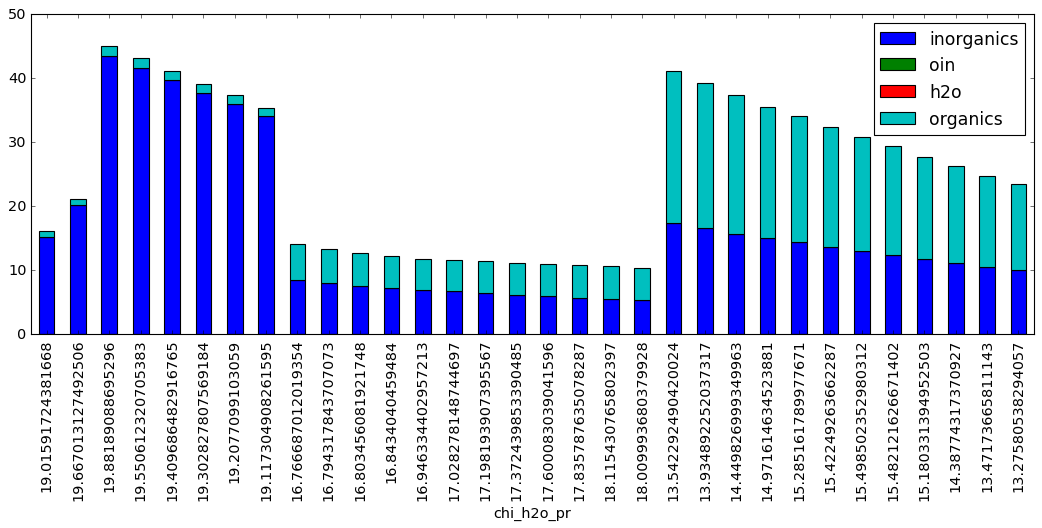

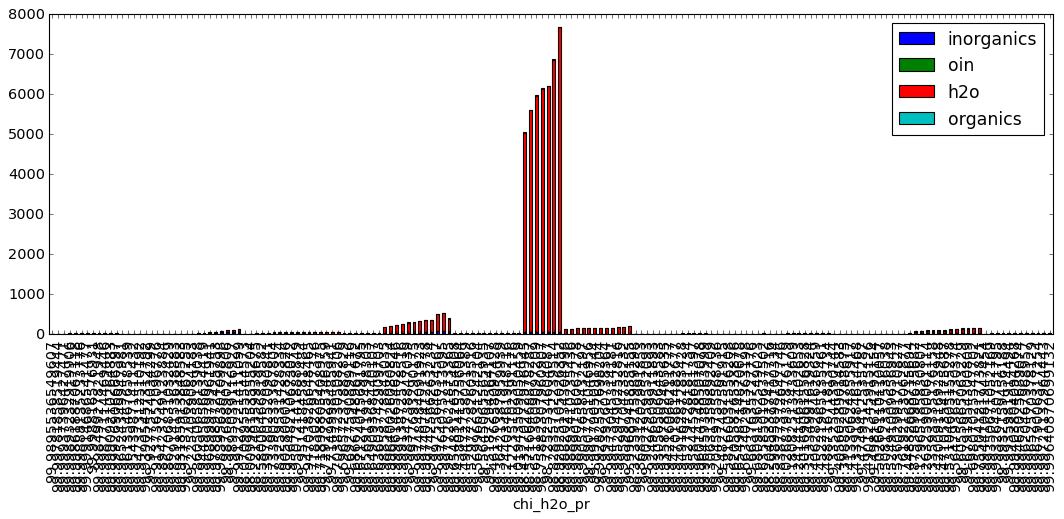

In [39]:
mpl.rcParams['font.size'] = 13
plt.rcParams['text.usetex'] = False

df_m_lowchi.plot(x = 'chi_h2o_pr', kind = 'bar', stacked = True, figsize=(10*1.618,5))
df_m_highchi.plot(x = 'chi_h2o_pr', kind = 'bar', stacked = True, figsize=(10*1.618,5))
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# time series

## read data

In [2]:
# Read data
gas_mixing_ratio = np.zeros((3, 100, 49, 77))
sce_ind = np.zeros(100)
lib_ind = np.zeros(3)
hour = np.zeros(49)
time = np.zeros(49)

directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/nd_log'
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_0001" in filename) and (".nc") in filename:
#             print(filename)
            lib = int(filename[-67:-66])
            sce = int(filename[-35:-33])
            hr = int(filename[-5:-3]) - 1
            ncf = scipy.io.netcdf_file(filename, mmap=False)
            gas_mixing_ratio[lib, sce, hr, :] = ncf.variables["gas_mixing_ratio"].data
            sce_ind[sce] = sce
            lib_ind[lib] = lib
            time[hr] =  ncf.variables["time"].data/3600
            hour[:] = hr

In [3]:
temp = np.zeros((100,49))
p = np.zeros((100,49))

for i in range(100):
    f = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/nd_log/1_part_res/scenarios/scenario_00'+str(i).zfill(2)+'/out/urban_plume_0001_env.txt'
    temp[i,:] = pd.read_csv(f,header=None,sep='\s+').iloc[:,1] # time, temperature, RH, pressure, mixing height
    p[i,:] = pd.read_csv(f,header=None,sep='\s+').iloc[:,3]

print(temp.shape)
print(temp)
print(p)
d_env = {'temp': temp[:,:].ravel(),
         'p': p[:,:].ravel()}
df_env = pd.DataFrame(data=d_env)
print(df_env.shape)
# rh = df_env.iloc[:,2]*100

(100, 49)
[[265.262 265.262 265.262 ... 265.262 265.262 265.262]
 [266.099 266.099 266.099 ... 266.099 266.099 266.099]
 [302.013 302.013 302.013 ... 302.013 302.013 302.013]
 ...
 [303.849 303.849 303.849 ... 303.849 303.849 303.849]
 [266.46  266.46  266.46  ... 266.46  266.46  266.46 ]
 [289.486 289.486 289.486 ... 289.486 289.486 289.486]]
[[100000. 100000. 100000. ... 100000. 100000. 100000.]
 [100000. 100000. 100000. ... 100000. 100000. 100000.]
 [100000. 100000. 100000. ... 100000. 100000. 100000.]
 ...
 [100000. 100000. 100000. ... 100000. 100000. 100000.]
 [100000. 100000. 100000. ... 100000. 100000. 100000.]
 [100000. 100000. 100000. ... 100000. 100000. 100000.]]
(4900, 2)


In [4]:
n2o5_error = (gas_mixing_ratio[2, :, :, 7].ravel() - gas_mixing_ratio[1, :, :, 7].ravel())/gas_mixing_ratio[1, :, :, 7].ravel()
o3_error = (gas_mixing_ratio[2, :, :, 10].ravel() - gas_mixing_ratio[1, :, :, 10].ravel())/gas_mixing_ratio[1, :, :, 10].ravel()
no_error = (gas_mixing_ratio[2, :, :, 4].ravel() - gas_mixing_ratio[1, :, :, 4].ravel())/gas_mixing_ratio[1, :, :, 4].ravel()
no2_error = (gas_mixing_ratio[2, :, :, 5].ravel() - gas_mixing_ratio[1, :, :, 5].ravel())/gas_mixing_ratio[1, :, :, 5].ravel()
hno3_error = (gas_mixing_ratio[2, :, :, 1].ravel() - gas_mixing_ratio[1, :, :, 1].ravel())/gas_mixing_ratio[1, :, :, 1].ravel()

d_gas = {'n2o5_ref': gas_mixing_ratio[1, :, :, 7].ravel(),
         'n2o5_comp': gas_mixing_ratio[2, :, :, 7].ravel(),
         "n2o5_error": n2o5_error * 100,
         'o3_ref': gas_mixing_ratio[1, :, :, 10].ravel(),
         'o3_comp': gas_mixing_ratio[2, :, :, 10].ravel(),
         "o3_error": o3_error * 100,
         'no_ref': gas_mixing_ratio[1, :, :, 4].ravel(),
         'no_comp': gas_mixing_ratio[2, :, :, 4].ravel(),
         "no_error": no_error * 100,
         'no2_ref': gas_mixing_ratio[1, :, :, 5].ravel(),
         'no2_comp': gas_mixing_ratio[2, :, :, 5].ravel(),
         "no2_error": no2_error * 100,
         'hno3_ref': gas_mixing_ratio[1, :, :, 1].ravel()*(df_env.p*63e-3)/(8.314*df_env.temp),
         'hno3_comp': gas_mixing_ratio[2, :, :, 1].ravel()*(df_env.p*63e-3)/(8.314*df_env.temp),
         "hno3_error": hno3_error * 100}
df_gas = pd.DataFrame(data=d_gas)

In [5]:
df_gas_2ndngt = df_gas[((df_gas.index.values % 49) >= 37) & ((df_gas.index.values % 49) <= 48)]  # ngt: night
print(df_gas_2ndngt.shape)

df_gas_2ndday = df_gas[((df_gas.index.values % 49) >= 25) & ((df_gas.index.values % 49) <= 48)]
print(df_gas_2ndday.shape)

case_index = df_gas_2ndngt.index.values
sce_index  = (case_index/49).astype(int)
hour_index = case_index % 49

dn_case_index = df_gas_2ndday.index.values  # dn: day and night
dn_sce_index  = (dn_case_index/49).astype(int)
dn_hour_index = dn_case_index % 49

pd.set_option('display.max_rows', None)
# print(df_gas_2ndngt.sort_values('n2o5_error', ascending = True))

(1200, 15)
(2400, 15)


In [6]:
#Read data
bulk_conc = np.zeros((3,2,100,49))

directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/nd_log'
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_process" in filename) and (".nc") in filename: 
#             print(filename)
            sce = int(filename[-29:-27])
            lib = int(filename[-61:-60])
            ncf = scipy.io.netcdf_file(filename, mmap=False)
            time = ncf.variables["time"].data/3600
#             print(time)
            bulk_conc[lib,0,sce,:] = ncf.variables["bulk_no3_masses"].data*1e9
            bulk_conc[lib,1,sce,:] = ncf.variables["bulk_nh4_masses"].data*1e9

nitrate_error = ((gas_mixing_ratio[2, :, :, 1].ravel()*(df_env.p*63e-3)/(8.314*df_env.temp) +  bulk_conc[2, 0, :, :].ravel())-(gas_mixing_ratio[1, :, :, 1].ravel()*(df_env.p*63e-3)/(8.314*df_env.temp) + bulk_conc[1, 0, :, :].ravel()))/(gas_mixing_ratio[1, :, :, 1].ravel()*(df_env.p*63e-3)/(8.314*df_env.temp) + bulk_conc[1, 0, :, :].ravel())
        
d_aero = {'no3_ref': bulk_conc[1, 0, :, :].ravel(),
          'no3_comp': bulk_conc[2, 0, :, :].ravel(),
          'nitrate_ref': gas_mixing_ratio[1, :, :, 1].ravel()*(df_env.p*63e-3)/(8.314*df_env.temp) + bulk_conc[1, 0, :, :].ravel(),
          'nitrate_comp': gas_mixing_ratio[2, :, :, 1].ravel()*(df_env.p*63e-3)/(8.314*df_env.temp) +  bulk_conc[2, 0, :, :].ravel(),
          'nitrate_error': nitrate_error * 100,
          'nh4_ref': bulk_conc[1, 1, :, :].ravel(),
          'nh4_comp': bulk_conc[2, 1, :, :].ravel()}
df_aero = pd.DataFrame(data=d_aero)
print(df_aero.shape)  

# time = np.linspace(0,120,121)
# print(time)

(4900, 7)


In [7]:
df_aero_2ndngt = df_aero[((df_aero.index.values % 49) >= 37) & ((df_aero.index.values % 49) <= 48)]  # ngt: night
print(df_aero_2ndngt.shape)

case_index = df_aero_2ndngt.index.values
sce_index  = (case_index/49).astype(int)
hour_index = case_index % 49

pd.set_option('display.max_rows', None)
print(df_aero_2ndngt.sort_values('nitrate_error', ascending = True))

(1200, 7)
           no3_ref      no3_comp  nitrate_ref  nitrate_comp  nitrate_error  \
1508  1.588958e+00  1.595721e+00    18.202630     14.554610     -20.041170   
1509  1.585967e+00  1.588577e+00    17.938485     14.426475     -19.578074   
1507  1.622181e+00  1.612311e+00    17.727378     14.297616     -19.347262   
1510  1.712656e+00  1.783483e+00    17.670976     14.404397     -18.485559   
1511  1.930619e+00  2.020466e+00    17.927568     14.860236     -17.109583   
1512  2.159965e+00  2.236814e+00    18.825367     15.919229     -15.437351   
1513  2.356433e+00  2.469143e+00    20.420820     17.706176     -13.293508   
1311  0.000000e+00  0.000000e+00     0.251025      0.221016     -11.954486   
2645  1.012764e+01  8.653393e+00    12.410179     10.951880     -11.750834   
1320  0.000000e+00  0.000000e+00     0.228163      0.201795     -11.556787   
2003  1.704389e+01  1.461102e+01    18.940465     16.821426     -11.187891   
1321  0.000000e+00  0.000000e+00     0.232610      0.2

In [8]:
n2o5_error = (df_gas_2ndngt["n2o5_comp"] - df_gas_2ndngt["n2o5_ref"])/df_gas_2ndngt["n2o5_ref"]
nitrate_error = ((df_aero_2ndngt["no3_comp"]+df_gas_2ndngt["hno3_comp"])-(df_aero_2ndngt["no3_ref"]+df_gas_2ndngt["hno3_ref"]))/(df_aero_2ndngt["no3_ref"]+df_gas_2ndngt["hno3_ref"])
print(n2o5_error.max(),n2o5_error.min(),nitrate_error.max(),nitrate_error.min())
print(n2o5_error.sort_values(ascending = True))
print(nitrate_error.sort_values(ascending = True))
print(df_gas_2ndngt)
print(df_aero_2ndngt)

2.59428445199739 -0.8075897974100054 60.8517578040854 -0.20041170353816434
2449   -0.807590
2447   -0.747009
2448   -0.746803
2446   -0.743461
2445   -0.735219
2444   -0.720978
37     -0.716924
38     -0.710030
2443   -0.698064
2442   -0.663142
39     -0.639109
2095   -0.623271
2096   -0.614062
2441   -0.611909
2097   -0.602676
2098   -0.590330
2099   -0.583723
587    -0.557062
586    -0.548059
2440   -0.536875
585    -0.535888
1123   -0.533220
1122   -0.532055
1124   -0.522608
1121   -0.520269
1165   -0.519592
584    -0.518300
1120   -0.499549
40     -0.499504
1125   -0.499172
583    -0.494173
921    -0.493837
920    -0.486516
1164   -0.484523
919    -0.476637
1119   -0.471070
1861   -0.466916
1126   -0.463274
582    -0.457914
4845   -0.453273
1117   -0.444835
1116   -0.441289
3767   -0.439552
1118   -0.439180
1115   -0.438641
922    -0.432138
2439   -0.428662
3766   -0.424348
4844   -0.423723
4846   -0.421115
4309   -0.416095
674    -0.415103
4843   -0.406440
3765   -0.403883
581    

## plot

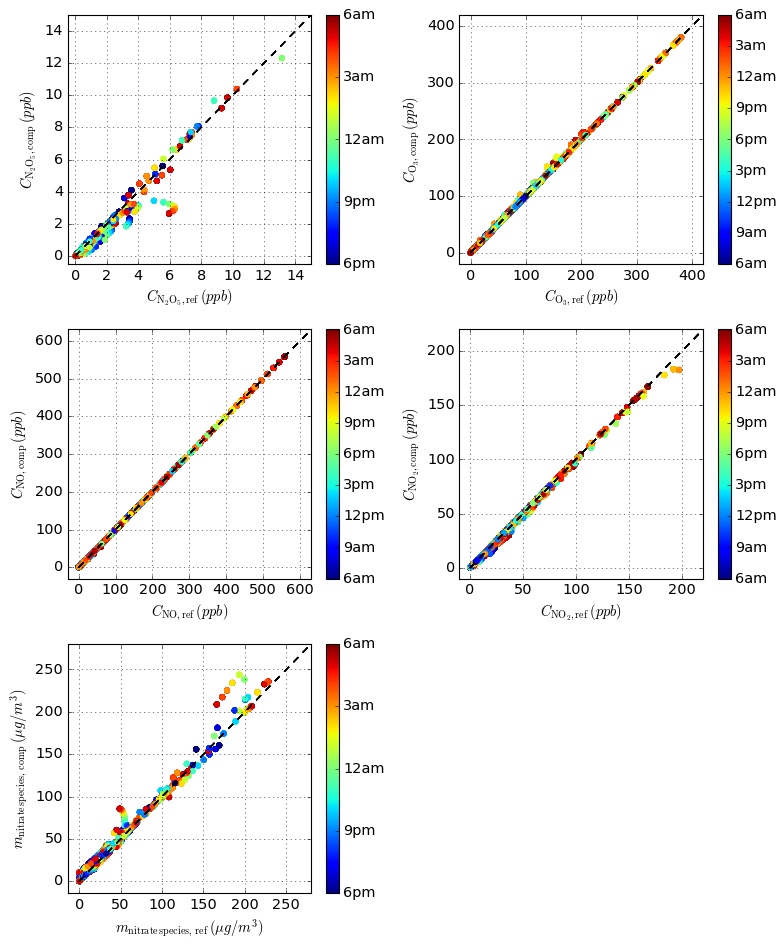

In [50]:
plt.figure(figsize=(10,12))
# from matplotlib import style
# plt.style.use('classic')
# plt.figure(facecolor="white")
# mpl.rc("figure", facecolor="white")

plt.subplot(3,2,1)
for t in range(37, 49, 1):
    p_n2o5 = plt.scatter(df_gas_2ndngt["n2o5_ref"], df_gas_2ndngt["n2o5_comp"], c=hour_index, s=30,edgecolors='none')   
    plt.plot([0,1e2],[0,1e2],'--', lw = 1, color='k')

plt.clim(37,49)
cbar = plt.colorbar(ticks = np.linspace(37,49,5))
cbar.ax.set_yticklabels(['6pm','9pm','12am','3am','6am'])
# ax.set_aspect('equal', adjustable='box')
plt.xlim(-0.5,15); plt.ylim(-0.5,15)
plt.xlabel(r'$C_{\rm N_2O_5, ref} \, (ppb)$')
plt.ylabel(r'$C_{\rm N_2O_5, comp} \, (ppb)$')
plt.grid()  
    
    
plt.subplot(3,2,2)
for t in range(25, 49, 1):
    p_o3 = plt.scatter(df_gas_2ndday["o3_ref"], df_gas_2ndday["o3_comp"], c=dn_hour_index, s=30,edgecolors='none')   
    plt.plot([0,1e3],[0,1e3],'--', lw = 1, color='k')

plt.clim(25,49)
cbar = plt.colorbar(ticks = np.linspace(25,49,9))
cbar.ax.set_yticklabels(['6am','9am','12pm','3pm','6pm','9pm','12am','3am','6am'])
plt.xlim(-20,420); plt.ylim(-20,420)
plt.xlabel(r'$C_{\rm O_3, ref} \, (ppb)$')
plt.ylabel(r'$C_{\rm O_3, comp} \, (ppb)$')
plt.grid()

plt.subplot(3,2,3)
for t in range(25, 49, 1):
    p_no = plt.scatter(df_gas_2ndday["no_ref"], df_gas_2ndday["no_comp"], c=dn_hour_index, s=30,edgecolors='none')   
    plt.plot([0,1e3],[0,1e3],'--', lw = 1, color='k')

plt.clim(25,49)
cbar = plt.colorbar(ticks = np.linspace(25,49,9))
cbar.ax.set_yticklabels(['6am','9am','12pm','3pm','6pm','9pm','12am','3am','6am'])
plt.xlim(-30,630); plt.ylim(-30,630)
plt.xlabel(r'$C_{\rm NO, ref} \, (ppb)$')
plt.ylabel(r'$C_{\rm NO, comp} \, (ppb)$')
plt.grid()

plt.subplot(3,2,4)
for t in range(25, 49, 1):
    p_no2 = plt.scatter(df_gas_2ndday["no2_ref"], df_gas_2ndday["no2_comp"], c=dn_hour_index, s=30,edgecolors='none')   
    plt.plot([0,1e3],[0,1e3],'--', lw = 1, color='k')

plt.clim(25,49)
cbar = plt.colorbar(ticks = np.linspace(25,49,9))
cbar.ax.set_yticklabels(['6am','9am','12pm','3pm','6pm','9pm','12am','3am','6am'])
plt.xlim(-10,220); plt.ylim(-10,220)
plt.xlabel(r'$C_{\rm NO_2, ref} \, (ppb)$')
plt.ylabel(r'$C_{\rm NO_2, comp} \, (ppb)$')
plt.grid()

plt.subplot(3,2,5)
for t in range(37, 49, 1):
    p_no3 = plt.scatter(df_aero_2ndngt["no3_ref"]+df_gas_2ndngt["hno3_ref"], df_aero_2ndngt["no3_comp"]+df_gas_2ndngt["hno3_comp"], c=hour_index, s=30,edgecolors='none')   
    plt.plot([0,3e3],[0,3e3],'--', lw = 1, color='k')

plt.clim(37,49)
cbar = plt.colorbar(ticks = np.linspace(37,49,5))
cbar.ax.set_yticklabels(['6pm','9pm','12am','3am','6am'])
plt.xlim(-14,280); plt.ylim(-14,280)
plt.xlabel(r'$m_{\rm nitrate\,species,\,ref} \, (\mu g/m^3)$')
plt.ylabel(r'$m_{\rm nitrate\,species,\,comp} \, (\mu g/m^3)$')
plt.grid()

# plt.subplot(3,2,6)
# for t in range(37, 49, 1):
#     p_hno3 = plt.scatter(df_gas_2ndngt["hno3_ref"], df_gas_2ndngt["hno3_comp"], c=hour_index, s=30,edgecolors='none')   
#     plt.plot([0,2e2],[0,2e2],'--', lw = 1, color='k')

# plt.clim(37,49)
# cbar = plt.colorbar(ticks = np.linspace(37,49,5))
# cbar.ax.set_yticklabels(['6pm','9pm','12am','3am','6am'])
# plt.xlim(-10,200); plt.ylim(-10,200)
# plt.xlabel(r'$C_{\rm HNO_3, ref} \, (ppb)$')
# plt.ylabel(r'$C_{\rm HNO_3, comp} \, (ppb)$')
# plt.grid()

plt.tight_layout(pad = 1.0)

# plt.savefig('mixing_state_impact_time_series.pdf')

In [32]:
d_large_errors = {'n2o5': df_gas_2ndngt.n2o5_error,
            'nitrate': df_aero_2ndngt.nitrate_error}
df_large_errors = pd.DataFrame(data = d_large_errors)

d_small_errors = {'o3': df_gas_2ndday.o3_error,
                'no': df_gas_2ndday.no_error,
                'no2': df_gas_2ndday.no2_error}
df_small_errors = pd.DataFrame(data = d_small_errors)

<AxesSubplot:>

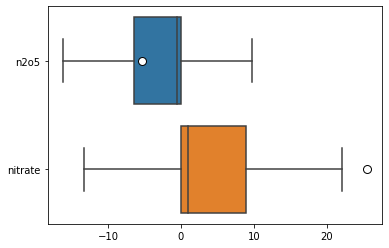

In [44]:
sns.boxplot(data = df_large_errors, orient = 'h', showfliers=False, showmeans = True, 
                    meanprops = {'marker': 'o', 'markerfacecolor': 'white', 'markeredgecolor': 'black', 'markersize': '8'})
# plt.xlim(-30,30)

<AxesSubplot:>

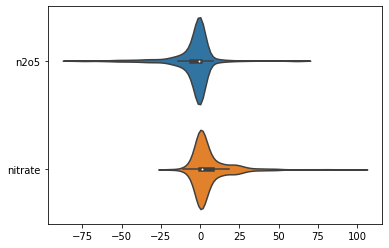

In [65]:
sns.violinplot(data = df_large_errors[(abs(df_large_errors['n2o5'])<100) & (abs(df_large_errors['nitrate'])<100)], orient = 'h')
# plt.xlim(-30,30)

<AxesSubplot:>

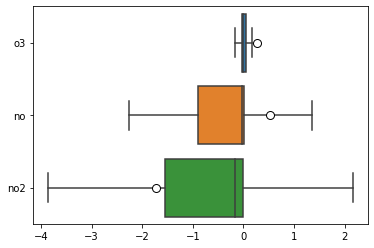

In [45]:
sns.boxplot(data = df_small_errors, orient = 'h', showfliers=False, showmeans = True, 
                    meanprops = {'marker': 'o', 'markerfacecolor': 'white', 'markeredgecolor': 'black', 'markersize': '8'})

<AxesSubplot:>

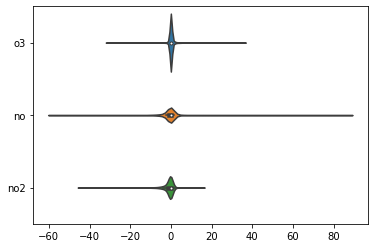

In [66]:
sns.violinplot(data = df_small_errors[(abs(df_small_errors['o3'])<100) & (abs(df_small_errors['no'])<100) & (abs(df_small_errors['no2'])<100)], orient = 'h')
# plt.xlim(-30,30)